In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# The starter code is short and simple, take a look!
from starter import *
from numpy import random

/opt/homebrew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Phase 1 - Create Inputs

In [3]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    for i in range(99):
        for j in range(i+1,100):
            G.add_edge(i, j, weight=1000)
    G.add_edge(0,1,weight=1000)
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    for i in range(2, 300):
        G.add_edge(i, 0, weight=700)
        G.add_edge(i, 1, weight=1000)
    G.add_edge(0,1,weight=800)    
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    for i in range(2, 1000):
        G.add_edge(i, 0, weight=500)
        G.add_edge(i, 1, weight=1000)
    G.add_edge(0,1,weight=415)

In [4]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

# Phase 2 - Implement your Solver

In [5]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
#     num_groups = G.number_of_nodes() // 3

    low = 2
    high = G.number_of_nodes()
    
    while True:
        lowCost = solve_helper(G.copy(), low)
        highCost = solve_helper(G.copy(), high)
        if lowCost < highCost and abs(low - high) > 1:
            high -= (high - low) // 2
        elif lowCost > highCost and abs(low - high) > 1:
            low += (high - low) // 2
        else:
            solve_helper(G, low)
            return

def solve_helper(G: nx.Graph, num_groups: int):
#     print(num_groups)
    # list of penguins
    penguin_list = list(G.nodes)
    # sort edges by weight
    # dictionary edge weight: vertices that make up that edge
    weight_dict = {}
    for edge in G.edges:
        key = G.get_edge_data(edge[0], edge[1])['weight']
        if key in weight_dict.keys():
            weight_dict[key].append(edge)
        else:
            weight_dict[key] = [edge]
    # list storing sorted keys descending
    weight_dict_keys_sorted = sorted(weight_dict.keys(), reverse=True)
    
    group_dict = {} # group_num : (group_size, group_weight, [])
    
    # creating the groups
    for i in range(1, num_groups + 1, 1):
        group_dict[i] = [0, 0, []]
    
    # iterating through edge weights in weight_dict
    for weight in weight_dict_keys_sorted:
        curr_edges = weight_dict[weight] # current edges starting from heaviest edge
        for edge in curr_edges:
            # Penguin 0
            group_size = get_group_size(group_dict) # group_size : [group_id's]
            group_size_keys_sorted = sorted(group_size.keys(), reverse=False) # sorting the size of each group ascending
            smallest_groups_list = group_size[group_size_keys_sorted[0]] # the list of group_id's corresponding to the smallest weight
            penguin_0 = edge[0]
            smallest_weight_added_id_penguin_0 = smallest_groups_list[0]
            smallest_weight_added_penguin_0 = float('inf')
            # Find the group ID with the smallest weight added and place it in smallest_weight_added_id
            for group in smallest_groups_list:
                weight_contributed = check_weight_contributed(G, group_dict, group_dict[group][2], penguin_0)
                if weight_contributed < smallest_weight_added_penguin_0:
                    smallest_weight_added_penguin_0 = weight_contributed
                    smallest_weight_added_id_penguin_0 = group
            # Add penguin 0 to the group and add it to all the dictionaries/lists needed, and remove it from all the dictionaries/lists needed
            if penguin_0 in penguin_list:
                group_dict[smallest_weight_added_id_penguin_0][0] += 1 # increasing group size
                group_dict[smallest_weight_added_id_penguin_0][1] += smallest_weight_added_penguin_0 # adding to the total weight of the group
                group_dict[smallest_weight_added_id_penguin_0][2].append(penguin_0) # adding penguin_0 to group_dict
                G.nodes[penguin_0]['team'] = smallest_weight_added_id_penguin_0
                penguin_list.remove(penguin_0)
            # Penguin 1
            group_size = get_group_size(group_dict) # group_size : [group_id's]
            group_size_keys_sorted = sorted(group_size.keys(), reverse=False) # sorting the size of each group ascending
            smallest_groups_list = group_size[group_size_keys_sorted[0]] # the list of group_id's corresponding to the smallest weight
            penguin_1 = edge[0]
            smallest_weight_added_id_penguin_1 = smallest_groups_list[0]
            smallest_weight_added_penguin_1 = float('inf')
            for group in smallest_groups_list:
                weight_contributed = check_weight_contributed(G, group_dict, group_dict[group][2], penguin_1)
                if weight_contributed < smallest_weight_added_penguin_1:
                    smallest_weight_added_penguin_1 = weight_contributed
                    smallest_weight_added_id_penguin_1 = group
            # Add penguin 1 to the group and add it to all the dictionaries/lists needed, and remove it from all the dictionaries/lists needed
            if penguin_1 in penguin_list:
                group_dict[smallest_weight_added_id_penguin_1][0] += 1 # increasing group size
                group_dict[smallest_weight_added_id_penguin_1][1] += smallest_weight_added_penguin_0 # adding to the total weight of the group
                group_dict[smallest_weight_added_id_penguin_1][2].append(penguin_1) # adding penguin_1 to group_dict
                G.nodes[penguin_1]['team'] = smallest_weight_added_id_penguin_1
                penguin_list.remove(penguin_1)
    # dealing with leftover penguins
    for penguin in penguin_list:
        group_size = get_group_size(group_dict) # group_size : [group_id's]
        group_size_keys_sorted = sorted(group_size.keys(), reverse=False) # sorting the size of each group ascending
        smallest_groups_list = group_size[group_size_keys_sorted[0]] # the list of group_id's corresponding to the smallest weight
        # Add penguin to the group and add it to all the dictionaries/lists needed, and remove it from all the dictionaries/lists needed
        group_dict[smallest_groups_list[0]][0] += 1 # increasing group size
        group_dict[smallest_groups_list[0]][2].append(penguin) # adding penguin to group_dict
        G.nodes[penguin]['team'] = smallest_groups_list[0]
    return score(G)

def get_group_size(group_dict: dict) -> dict:
    """
    get group size
    """
    group_size = {} # group size : [group_id's]
    for group_id in group_dict:
        value = group_dict[group_id]
        if value[0] in group_size:
            group_size[value[0]].append(group_id)
        else:
            group_size[value[0]] = [group_id]
    return group_size

def check_weight_contributed(G: nx.graph, group_dict: dict, penguins_in_group: list, incoming_penguin: int) -> int:
    """
    returns new weight of the group after adding incoming_penguin
    """
    total_weight = 0
    for penguin in penguins_in_group:
        edge_data = G.get_edge_data(incoming_penguin, penguin)
        if edge_data:
            total_weight += edge_data['weight']
    return total_weight

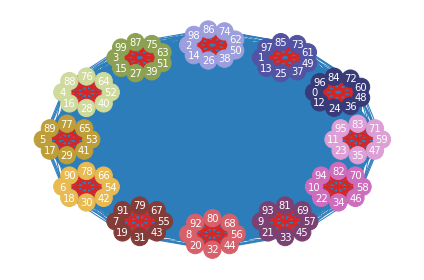

408346.01581064693

In [6]:
G = read_input('small.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

In [7]:
run(solve, 'small.in', 'small.out')

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

In [8]:
run_all(solve, 'input', 'output')
tar('output')

  0%|                                           | 1/780 [00:01<19:24,  1.50s/it]

input/large225.in: cost 44576.78135317254


  0%|                                           | 2/780 [00:01<10:55,  1.19it/s]

input/small232.in: cost 25771.506101865805


  0%|▏                                          | 3/780 [00:03<13:26,  1.04s/it]

input/large116.in: cost 119002.78135317254


  1%|▏                                          | 4/780 [00:07<29:36,  2.29s/it]

input/large59.in: cost 119022.78135317254


  1%|▎                                          | 5/780 [00:08<25:05,  1.94s/it]

input/small150.in: cost 135387.14243574018


  1%|▎                                        | 6/780 [00:20<1:06:25,  5.15s/it]

input/large147.in: cost 448591.00044834876


  1%|▍                                          | 7/780 [00:21<51:56,  4.03s/it]

input/small101.in: cost 176689.14243574018


  1%|▍                                          | 8/780 [00:22<40:05,  3.12s/it]

input/small197.in: cost 141669.14243574018


  1%|▍                                          | 9/780 [00:23<29:03,  2.26s/it]

input/small206.in: cost 82481.6478572415


  1%|▌                                       | 10/780 [00:34<1:03:40,  4.96s/it]

input/large240.in: cost 460747.00044834876


  1%|▌                                       | 11/780 [00:46<1:32:21,  7.21s/it]

input/medium7.in: cost 325277.6047309474


  2%|▌                                       | 12/780 [00:48<1:10:20,  5.50s/it]

input/small257.in: cost 246225.14243574018


  2%|▋                                       | 13/780 [01:20<2:53:00, 13.53s/it]

input/large180.in: cost 108766.26224646512


  2%|▋                                       | 14/780 [02:02<4:44:31, 22.29s/it]

input/large211.in: cost 175400.26224646514


  2%|▊                                       | 15/780 [02:04<3:24:42, 16.06s/it]

input/small135.in: cost 211004.14243574018


  2%|▊                                       | 16/780 [02:05<2:26:13, 11.48s/it]

input/small68.in: cost 54320.31591025766


  2%|▊                                       | 17/780 [02:05<1:44:49,  8.24s/it]

input/medium249.in: cost 272.8281828459045


  2%|▉                                       | 18/780 [02:07<1:19:02,  6.22s/it]

input/large173.in: cost 19710.781353172537


  2%|▉                                       | 19/780 [02:09<1:01:24,  4.84s/it]

input/small164.in: cost 135179.14243574018


  3%|█                                         | 20/780 [02:10<50:08,  3.96s/it]

input/medium218.in: cost 28312.78632889136


  3%|█▏                                        | 21/780 [02:13<44:38,  3.53s/it]

input/medium189.in: cost 33784.10407476327


  3%|█▏                                        | 22/780 [02:13<31:59,  2.53s/it]

input/small39.in: cost 25352.506101865805


  3%|█▏                                        | 23/780 [02:20<47:15,  3.75s/it]

input/large122.in: cost 272.8281828459045


  3%|█▎                                        | 24/780 [02:21<39:09,  3.11s/it]

input/medium84.in: cost 5688.786328891362


  3%|█▎                                      | 25/780 [02:32<1:08:13,  5.42s/it]

input/medium26.in: cost 220594.60473094735


  3%|█▍                                        | 26/780 [02:33<49:18,  3.92s/it]

input/medium77.in: cost 65044.10407476327


  3%|█▍                                        | 27/780 [02:37<50:24,  4.02s/it]

input/medium43.in: cost 212094.60473094735


  4%|█▍                                      | 28/780 [02:49<1:20:47,  6.45s/it]

input/medium12.in: cost 188400.60473094735


  4%|█▌                                        | 29/780 [02:49<57:57,  4.63s/it]

input/medium53.in: cost 24312.78632889136


  4%|█▌                                      | 30/780 [03:02<1:26:39,  6.93s/it]

input/medium67.in: cost 358046.6047309474


  4%|█▌                                      | 31/780 [03:07<1:21:14,  6.51s/it]

input/medium36.in: cost 362842.31591025763


  4%|█▋                                      | 32/780 [03:10<1:07:12,  5.39s/it]

input/medium94.in: cost 24470.604730947358


  4%|█▋                                      | 33/780 [03:37<2:26:51, 11.80s/it]

input/large132.in: cost 243460.26224646514


  4%|█▋                                      | 34/780 [03:38<1:48:15,  8.71s/it]

input/small174.in: cost 138528.14243574018


  4%|█▊                                      | 35/780 [03:40<1:21:54,  6.60s/it]

input/small29.in: cost 197654.14243574018


  5%|█▊                                      | 36/780 [03:47<1:22:04,  6.62s/it]

input/medium199.in: cost 89416.31591025766


  5%|█▉                                      | 37/780 [03:48<1:03:04,  5.09s/it]

input/medium208.in: cost 33407.78632889136


  5%|█▉                                      | 38/780 [03:59<1:25:03,  6.88s/it]

input/large163.in: cost 451578.2328713623


  5%|██                                      | 39/780 [04:00<1:02:30,  5.06s/it]

input/small125.in: cost 61594.64785724149


  5%|██▏                                       | 40/780 [04:04<58:54,  4.78s/it]

input/medium259.in: cost 174491.60473094735


  5%|██▏                                       | 41/780 [04:05<45:07,  3.66s/it]

input/small78.in: cost 226971.14243574018


  5%|██▏                                     | 42/780 [04:26<1:48:18,  8.81s/it]

input/large201.in: cost 84505.31591025766


  6%|██▏                                     | 43/780 [05:06<3:41:47, 18.06s/it]

input/large190.in: cost 202068.0004483488


  6%|██▎                                     | 44/780 [05:06<2:37:01, 12.80s/it]

input/small247.in: cost 76753.6478572415


  6%|██▎                                     | 46/780 [06:00<3:35:26, 17.61s/it]

input/large250.in: cost 202978.26224646514
input/small216.in: cost 34203.64785724149


  6%|██▍                                     | 47/780 [06:02<2:36:58, 12.85s/it]

input/small187.in: cost 178012.14243574018


  6%|██▍                                     | 48/780 [06:04<1:56:08,  9.52s/it]

input/small111.in: cost 194956.14243574018


  6%|██▌                                     | 49/780 [06:45<3:52:11, 19.06s/it]

input/large157.in: cost 80758.31591025766


  6%|██▌                                     | 50/780 [07:13<4:23:08, 21.63s/it]

input/large18.in: cost 178742.0004483488


  7%|██▌                                     | 51/780 [07:14<3:09:36, 15.61s/it]

input/small140.in: cost 249100.14243574018


  7%|██▋                                     | 52/780 [08:00<4:59:54, 24.72s/it]

input/large49.in: cost 169987.26224646514


  7%|██▋                                     | 53/780 [08:03<3:39:13, 18.09s/it]

input/large106.in: cost 37304.78135317254


  7%|██▊                                     | 54/780 [08:04<2:37:07, 12.99s/it]

input/small222.in: cost 408346.01581064693


  7%|██▊                                     | 55/780 [08:09<2:09:01, 10.68s/it]

input/large235.in: cost 3509.6378778446224


  7%|██▊                                     | 56/780 [08:11<1:35:48,  7.94s/it]

input/small253.in: cost 137213.14243574018


  7%|██▉                                     | 57/780 [08:17<1:30:39,  7.52s/it]

input/medium3.in: cost 615842.3159102576


  7%|██▉                                     | 58/780 [09:01<3:40:19, 18.31s/it]

input/large215.in: cost 86907.26224646512


  8%|███                                     | 59/780 [09:07<2:57:19, 14.76s/it]

input/large184.in: cost 14842.31591025766


  8%|███                                     | 60/780 [09:09<2:09:53, 10.82s/it]

input/small202.in: cost 284975.01581064693


  8%|███▏                                    | 61/780 [09:09<1:32:11,  7.69s/it]

input/small193.in: cost 26465.506101865805


  8%|███▏                                    | 62/780 [09:27<2:09:19, 10.81s/it]

input/large244.in: cost 90148.31591025766


  8%|███▏                                    | 63/780 [09:27<1:31:17,  7.64s/it]

input/small160.in: cost 34471.14243574018


  8%|███▎                                    | 64/780 [09:30<1:13:15,  6.14s/it]

input/large126.in: cost 58123.81500331443


  8%|███▎                                    | 65/780 [09:33<1:03:04,  5.29s/it]

input/large69.in: cost 272.8281828459045


  8%|███▌                                      | 66/780 [09:34<45:09,  3.79s/it]

input/small131.in: cost 68571.14243574018


  9%|███▍                                    | 67/780 [09:46<1:14:24,  6.26s/it]

input/large38.in: cost 187893.78135317253


  9%|███▍                                    | 68/780 [10:32<3:36:22, 18.23s/it]

input/large177.in: cost 38881.78135317254


  9%|███▌                                    | 69/780 [10:32<2:32:47, 12.89s/it]

input/small236.in: cost 25423.506101865805


  9%|███▌                                    | 70/780 [11:05<3:43:11, 18.86s/it]

input/large221.in: cost 96664.26224646512


  9%|███▋                                    | 71/780 [11:08<2:45:25, 14.00s/it]

input/large143.in: cost 41546.81500331443


  9%|███▋                                    | 72/780 [11:08<1:56:24,  9.87s/it]

input/small58.in: cost 5462.506101865805


  9%|███▋                                    | 73/780 [11:09<1:25:02,  7.22s/it]

input/small105.in: cost 388346.01581064693


  9%|███▊                                    | 74/780 [11:56<3:43:31, 19.00s/it]

input/large112.in: cost 121139.26224646512


 10%|███▊                                    | 75/780 [12:09<3:22:34, 17.24s/it]

input/medium228.in: cost 36190.10407476327


 10%|███▉                                    | 76/780 [12:09<2:22:30, 12.14s/it]

input/small154.in: cost 24471.14243574018


 10%|███▉                                    | 77/780 [12:09<1:40:28,  8.58s/it]

input/medium16.in: cost 65103.10407476327


 10%|████                                    | 78/780 [12:12<1:19:46,  6.82s/it]

input/medium47.in: cost 24470.604730947358


 10%|████                                    | 79/780 [12:22<1:30:04,  7.71s/it]

input/medium80.in: cost 139974.60473094735


 10%|████                                    | 80/780 [12:34<1:46:31,  9.13s/it]

input/medium73.in: cost 219470.60473094735


 10%|████▏                                   | 81/780 [12:37<1:26:07,  7.39s/it]

input/medium22.in: cost 21090.205948025516


 11%|████▏                                   | 82/780 [12:40<1:07:47,  5.83s/it]

input/medium32.in: cost 531470.6047309474


 11%|████▍                                     | 83/780 [12:42<56:09,  4.83s/it]

input/medium63.in: cost 41269.10407476327


 11%|████▌                                     | 84/780 [12:43<43:30,  3.75s/it]

input/medium90.in: cost 39003.10407476327


 11%|████▌                                     | 85/780 [12:46<39:22,  3.40s/it]

input/medium57.in: cost 30471.104074763272


 11%|████▋                                     | 86/780 [12:48<33:21,  2.88s/it]

input/small19.in: cost 277198.01581064693


 11%|████▋                                     | 87/780 [12:49<27:15,  2.36s/it]

input/medium238.in: cost 27999.205948025516


 11%|████▋                                     | 88/780 [12:50<24:49,  2.15s/it]

input/small144.in: cost 269288.01581064693


 11%|████▌                                   | 89/780 [13:48<3:34:48, 18.65s/it]

input/large102.in: cost 130045.26224646512


 12%|████▌                                   | 90/780 [13:49<2:35:52, 13.55s/it]

input/small48.in: cost 167589.14243574018


 12%|████▋                                   | 91/780 [13:50<1:49:54,  9.57s/it]

input/small115.in: cost 29871.14243574018


 12%|████▋                                   | 92/780 [14:01<1:55:16, 10.05s/it]

input/large153.in: cost 278575.26224646514


 12%|█████                                     | 94/780 [14:02<59:38,  5.22s/it]

input/large231.in: cost 57048.81500331443
input/small226.in: cost 5462.506101865805


 12%|████▊                                   | 95/780 [14:47<3:15:22, 17.11s/it]

input/large260.in: cost 184239.0004483488


 12%|████▉                                   | 96/780 [15:34<4:57:04, 26.06s/it]

input/large167.in: cost 160939.26224646514


 13%|█████                                   | 98/780 [15:46<2:53:21, 15.25s/it]

input/large28.in: cost 69181.78135317254
input/small121.in: cost 111842.31591025766


 13%|█████                                   | 99/780 [16:18<3:51:57, 20.44s/it]

input/large79.in: cost 826515.2328713622


 13%|█████                                  | 100/780 [16:22<2:53:46, 15.33s/it]

input/large136.in: cost 48503.81500331443


 13%|█████                                  | 101/780 [16:23<2:05:09, 11.06s/it]

input/small170.in: cost 96130.31591025766


 13%|█████                                  | 102/780 [16:48<2:53:56, 15.39s/it]

input/large254.in: cost 159871.26224646514


 13%|█████▏                                 | 103/780 [16:49<2:03:25, 10.94s/it]

input/small183.in: cost 64939.939912785754


 13%|█████▏                                 | 104/780 [16:50<1:31:47,  8.15s/it]

input/small212.in: cost 283273.01581064693


 13%|█████▎                                 | 105/780 [16:55<1:19:39,  7.08s/it]

input/large194.in: cost 66406.78135317254


 14%|█████▎                                 | 106/780 [17:42<3:33:31, 19.01s/it]

input/large205.in: cost 129869.26224646512


 14%|█████▎                                 | 107/780 [17:43<2:32:32, 13.60s/it]

input/small243.in: cost 373436.01581064693


 14%|█████▍                                 | 108/780 [17:55<2:27:18, 13.15s/it]

input/medium2.in: cost 345902.4145999371


 14%|█████▍                                 | 109/780 [17:56<1:48:29,  9.70s/it]

input/small252.in: cost 154661.14243574018


 14%|█████▌                                 | 110/780 [18:08<1:53:54, 10.20s/it]

input/large185.in: cost 460094.2328713623


 14%|█████▌                                 | 111/780 [18:53<3:51:14, 20.74s/it]

input/large214.in: cost 179256.0004483488


 14%|█████▌                                 | 112/780 [18:55<2:47:04, 15.01s/it]

input/small192.in: cost 38699.64785724149


 14%|█████▋                                 | 113/780 [18:56<2:00:20, 10.83s/it]

input/small203.in: cost 408346.01581064693


 15%|█████▋                                 | 114/780 [18:57<1:29:23,  8.05s/it]

input/large245.in: cost 24368.815003314423


 15%|█████▊                                 | 115/780 [18:59<1:06:04,  5.96s/it]

input/small161.in: cost 76067.31591025766


 15%|█████▊                                 | 116/780 [19:08<1:19:08,  7.15s/it]

input/large68.in: cost 64057.78135317254


 15%|█████▊                                 | 117/780 [19:16<1:19:08,  7.16s/it]

input/large127.in: cost 31403.781353172537


 15%|██████▏                                  | 118/780 [19:17<59:58,  5.44s/it]

input/small130.in: cost 148492.31591025766


 15%|█████▉                                 | 119/780 [19:26<1:11:34,  6.50s/it]

input/large176.in: cost 77224.78135317254


 15%|██████▎                                  | 120/780 [19:28<57:17,  5.21s/it]

input/large39.in: cost 49205.78135317254


 16%|██████▎                                  | 121/780 [19:30<44:52,  4.09s/it]

input/small237.in: cost 159935.14243574018


 16%|██████                                 | 122/780 [20:16<3:02:15, 16.62s/it]

input/large220.in: cost 144563.26224646514


 16%|██████▏                                | 123/780 [20:27<2:43:35, 14.94s/it]

input/large142.in: cost 826522.2328713622


 16%|██████▏                                | 124/780 [20:28<1:58:25, 10.83s/it]

input/small104.in: cost 127251.14243574018


 16%|██████▎                                | 125/780 [20:29<1:26:17,  7.90s/it]

input/small59.in: cost 408346.01581064693


 16%|██████▎                                | 126/780 [20:45<1:54:09, 10.47s/it]

input/large113.in: cost 442926.2328713623


 16%|██████▎                                | 127/780 [20:46<1:22:14,  7.56s/it]

input/small155.in: cost 66091.31591025766


 16%|██████▋                                  | 128/780 [20:47<59:17,  5.46s/it]

input/medium229.in: cost 4209.168907033806


 17%|██████▍                                | 129/780 [20:57<1:15:43,  6.98s/it]

input/medium17.in: cost 356229.6047309474


 17%|██████▊                                  | 130/780 [20:57<53:43,  4.96s/it]

input/medium46.in: cost 65003.10407476327


 17%|██████▉                                  | 131/780 [21:01<50:10,  4.64s/it]

input/medium81.in: cost 63753.10407476327


 17%|██████▉                                  | 132/780 [21:02<38:41,  3.58s/it]

input/medium72.in: cost 36214.10407476327


 17%|██████▉                                  | 133/780 [21:03<29:27,  2.73s/it]

input/medium23.in: cost 38461.20594802552


 17%|███████                                  | 134/780 [21:10<41:36,  3.87s/it]

input/medium33.in: cost 358343.8793492735


 17%|██████▊                                | 135/780 [21:21<1:04:35,  6.01s/it]

input/medium62.in: cost 282961.6047309474


 17%|███████▏                                 | 136/780 [21:22<48:40,  4.53s/it]

input/medium91.in: cost 36818.20594802552


 18%|███████▏                                 | 137/780 [21:28<53:36,  5.00s/it]

input/medium56.in: cost 105802.31591025766


 18%|███████▎                                 | 138/780 [21:28<38:43,  3.62s/it]

input/small145.in: cost 22300.506101865805


 18%|███████▎                                 | 139/780 [21:29<30:40,  2.87s/it]

input/medium239.in: cost 37431.20594802552


 18%|███████▎                                 | 140/780 [21:30<23:20,  2.19s/it]

input/small18.in: cost 63998.31591025766


 18%|███████                                | 141/780 [22:18<2:48:53, 15.86s/it]

input/large103.in: cost 89204.26224646512


 18%|███████                                | 142/780 [22:19<2:03:11, 11.58s/it]

input/small114.in: cost 396674.01581064693


 18%|███████▏                               | 143/780 [22:20<1:29:27,  8.43s/it]

input/small49.in: cost 128242.31591025766


 18%|███████▏                               | 144/780 [22:27<1:23:03,  7.84s/it]

input/large152.in: cost 59820.78135317254


 19%|███████▎                               | 145/780 [22:29<1:03:32,  6.00s/it]

input/large230.in: cost 501219.2493960704


 19%|███████▋                                 | 146/780 [22:30<49:34,  4.69s/it]

input/small227.in: cost 181950.14243574018


 19%|███████▎                               | 147/780 [23:17<3:04:06, 17.45s/it]

input/large29.in: cost 151004.26224646514


 19%|███████▍                               | 148/780 [23:42<3:25:59, 19.56s/it]

input/large166.in: cost 194361.31591025766


 19%|███████▍                               | 149/780 [23:43<2:27:24, 14.02s/it]

input/small120.in: cost 408346.01581064693


 19%|███████▌                               | 150/780 [24:04<2:49:17, 16.12s/it]

input/large137.in: cost 94760.31591025766


 19%|███████▌                               | 151/780 [24:41<3:55:03, 22.42s/it]

input/large78.in: cost 11609.637877844621


 19%|███████▌                               | 152/780 [24:42<2:47:16, 15.98s/it]

input/small171.in: cost 324346.01581064693


 20%|███████▋                               | 153/780 [25:13<3:32:57, 20.38s/it]

input/large255.in: cost 97105.31591025766


 20%|███████▋                               | 154/780 [25:15<2:34:11, 14.78s/it]

input/small213.in: cost 193949.14243574018


 20%|███████▋                               | 155/780 [25:16<1:52:08, 10.77s/it]

input/small182.in: cost 217348.01581064696


 20%|███████▊                               | 156/780 [25:17<1:22:24,  7.92s/it]

input/large204.in: cost 67922.78135317254


 20%|███████▊                               | 157/780 [26:03<3:20:31, 19.31s/it]

input/large195.in: cost 117596.26224646512


 20%|███████▉                               | 158/780 [26:05<2:25:22, 14.02s/it]

input/small242.in: cost 172592.14243574018


 20%|███████▉                               | 159/780 [26:16<2:15:36, 13.10s/it]

input/large224.in: cost 202856.26224646514


 21%|████████                               | 160/780 [26:16<1:36:06,  9.30s/it]

input/small233.in: cost 20500.506101865805


 21%|████████                               | 161/780 [26:19<1:15:09,  7.29s/it]

input/large58.in: cost 2009.6378778446226


 21%|████████                               | 162/780 [26:22<1:03:53,  6.20s/it]

input/large117.in: cost 62948.78135317254


 21%|████████▌                                | 163/780 [26:24<49:44,  4.84s/it]

input/small151.in: cost 210194.01581064696


 21%|████████▏                              | 164/780 [26:47<1:44:54, 10.22s/it]

input/large146.in: cost 92850.26224646512


 21%|████████▎                              | 165/780 [26:48<1:16:35,  7.47s/it]

input/small100.in: cost 408346.01581064693


 21%|████████▋                                | 166/780 [26:48<54:12,  5.30s/it]

input/small207.in: cost 22989.506101865805


 21%|████████▊                                | 167/780 [26:50<42:50,  4.19s/it]

input/small196.in: cost 167740.14243574018


 22%|████████▊                                | 168/780 [26:51<34:15,  3.36s/it]

input/large241.in: cost 105569.78135317254


 22%|████████▉                                | 169/780 [26:52<25:37,  2.52s/it]

input/small256.in: cost 249471.14243574018


 22%|████████▉                                | 170/780 [26:52<19:05,  1.88s/it]

input/medium6.in: cost 67833.10407476328


 22%|████████▉                                | 171/780 [26:55<21:24,  2.11s/it]

input/large210.in: cost 48164.81500331443


 22%|████████▌                              | 172/780 [27:15<1:15:53,  7.49s/it]

input/large181.in: cost 617963.2328713622


 22%|████████▋                              | 173/780 [27:29<1:35:35,  9.45s/it]

input/medium248.in: cost 257483.60473094735


 22%|████████▋                              | 174/780 [27:29<1:08:28,  6.78s/it]

input/small69.in: cost 139842.31591025766


 22%|█████████▏                               | 175/780 [27:31<52:42,  5.23s/it]

input/small134.in: cost 174595.14243574018


 23%|████████▊                              | 176/780 [27:40<1:02:51,  6.24s/it]

input/large172.in: cost 69132.78135317254


 23%|█████████▎                               | 177/780 [27:41<49:17,  4.90s/it]

input/small38.in: cost 164211.14243574018


 23%|████████▉                              | 178/780 [27:52<1:05:03,  6.48s/it]

input/medium188.in: cost 25530.78632889136


 23%|████████▉                              | 179/780 [28:04<1:24:07,  8.40s/it]

input/medium219.in: cost 326551.6047309474


 23%|█████████                              | 180/780 [28:06<1:03:22,  6.34s/it]

input/small165.in: cost 131314.14243574018


 23%|█████████                              | 181/780 [28:50<2:55:57, 17.63s/it]

input/large123.in: cost 140292.31591025766


 23%|█████████                              | 182/780 [28:54<2:16:14, 13.67s/it]

input/medium85.in: cost 75303.10407476328


 23%|█████████▏                             | 183/780 [29:09<2:17:41, 13.84s/it]

input/medium27.in: cost 223582.60473094735


 24%|█████████▏                             | 184/780 [29:14<1:53:54, 11.47s/it]

input/medium76.in: cost 79596.31591025766


 24%|█████████▎                             | 185/780 [29:20<1:34:45,  9.56s/it]

input/medium42.in: cost 666515.414599937


 24%|█████████▎                             | 186/780 [29:31<1:39:32, 10.05s/it]

input/medium13.in: cost 402795.6047309474


 24%|█████████▎                             | 187/780 [29:43<1:45:58, 10.72s/it]

input/medium52.in: cost 185479.60473094735


 24%|█████████▍                             | 188/780 [29:46<1:24:06,  8.52s/it]

input/medium66.in: cost 708515.414599937


 24%|█████████▍                             | 189/780 [29:54<1:22:26,  8.37s/it]

input/medium37.in: cost 111395.60473094735


 24%|█████████▌                             | 190/780 [30:06<1:32:22,  9.39s/it]

input/medium95.in: cost 296691.6047309474


 24%|█████████▌                             | 191/780 [30:08<1:10:55,  7.22s/it]

input/large133.in: cost 45614.78135317254


 25%|█████████▌                             | 192/780 [30:17<1:15:38,  7.72s/it]

input/medium209.in: cost 532176.6047309474


 25%|█████████▋                             | 193/780 [30:30<1:31:32,  9.36s/it]

input/medium198.in: cost 322161.6047309474


 25%|█████████▋                             | 194/780 [30:32<1:09:00,  7.07s/it]

input/small28.in: cost 182066.14243574018


 25%|██████████▎                              | 195/780 [30:34<51:59,  5.33s/it]

input/small175.in: cost 129733.14243574018


 25%|██████████▎                              | 196/780 [30:41<57:04,  5.86s/it]

input/large162.in: cost 519842.31591025763


 25%|██████████▎                              | 197/780 [30:41<40:41,  4.19s/it]

input/small79.in: cost 104842.31591025766


 25%|██████████▍                              | 198/780 [30:42<30:51,  3.18s/it]

input/medium258.in: cost 159470.60473094735


 26%|██████████▍                              | 199/780 [30:43<25:51,  2.67s/it]

input/small124.in: cost 210714.14243574018


 26%|██████████▌                              | 200/780 [30:52<44:58,  4.65s/it]

input/large191.in: cost 96802.78135317254


 26%|██████████                             | 201/780 [31:03<1:01:19,  6.36s/it]

input/large200.in: cost 146970.26224646514


 26%|██████████▌                              | 202/780 [31:03<44:26,  4.61s/it]

input/small246.in: cost 64203.64785724149


 26%|██████████▏                            | 203/780 [31:31<1:51:23, 11.58s/it]

input/large251.in: cost 34144.81500331443


 26%|██████████▏                            | 204/780 [31:32<1:18:55,  8.22s/it]

input/small186.in: cost 24208.647857241493


 26%|██████████▊                              | 205/780 [31:33<59:16,  6.19s/it]

input/small217.in: cost 129043.31591025766


 26%|██████████▊                              | 206/780 [31:34<44:29,  4.65s/it]

input/small110.in: cost 408346.01581064693


 27%|██████████▎                            | 207/780 [31:45<1:02:15,  6.52s/it]

input/large19.in: cost 598023.2328713622


 27%|██████████▉                              | 208/780 [31:48<52:36,  5.52s/it]

input/large156.in: cost 120002.78135317254


 27%|██████████▉                              | 209/780 [31:49<37:59,  3.99s/it]

input/small141.in: cost 26837.647857241493


 27%|███████████                              | 210/780 [31:59<57:16,  6.03s/it]

input/large107.in: cost 816515.2328713622


 27%|██████████▌                            | 211/780 [32:10<1:11:13,  7.51s/it]

input/large48.in: cost 445575.00044834876


 27%|███████████▏                             | 212/780 [32:12<54:32,  5.76s/it]

input/small223.in: cost 310155.01581064693


 27%|██████████▋                            | 213/780 [32:55<2:41:22, 17.08s/it]

input/large234.in: cost 271527.00044834876


 27%|██████████▋                            | 214/780 [33:08<2:29:27, 15.84s/it]

input/medium49.in: cost 227095.60473094735


 28%|██████████▊                            | 215/780 [33:14<1:58:55, 12.63s/it]

input/medium18.in: cost 87841.31591025766


 28%|██████████▊                            | 216/780 [33:17<1:32:27,  9.84s/it]

input/large53.in: cost 272.8281828459045


 28%|██████████▊                            | 217/780 [33:24<1:25:54,  9.15s/it]

input/medium226.in: cost 92731.60473094735


 28%|██████████▉                            | 218/780 [33:25<1:00:36,  6.47s/it]

input/small56.in: cost 62604.50610186581


 28%|███████████▌                             | 219/780 [33:26<46:31,  4.98s/it]

input/medium115.in: cost 5712.786328891362


 28%|███████████                            | 220/780 [33:41<1:14:59,  8.04s/it]

input/medium144.in: cost 171094.60473094735


 28%|███████████▌                             | 221/780 [33:42<53:34,  5.75s/it]

input/small238.in: cost 27867.647857241493


 28%|███████████▋                             | 222/780 [33:47<51:56,  5.58s/it]

input/medium243.in: cost 687470.6047309474


 29%|███████████▋                             | 223/780 [33:49<41:11,  4.44s/it]

input/small62.in: cost 165064.14243574018


 29%|███████████▊                             | 224/780 [33:53<40:33,  4.38s/it]

input/large179.in: cost 82502.78135317254


 29%|███████████▊                             | 225/780 [33:54<30:27,  3.29s/it]

input/large36.in: cost 64002.78135317254


 29%|███████████▉                             | 226/780 [33:56<28:25,  3.08s/it]

input/medium183.in: cost 214470.60473094735


 29%|███████████▉                             | 227/780 [33:57<22:49,  2.48s/it]

input/small33.in: cost 408346.01581064693


 29%|███████████▉                             | 228/780 [34:03<32:32,  3.54s/it]

input/medium212.in: cost 119342.31591025766


 29%|███████████▍                           | 229/780 [34:50<2:30:38, 16.40s/it]

input/large67.in: cost 226886.0004483488


 29%|███████████▌                           | 230/780 [34:53<1:52:46, 12.30s/it]

input/large128.in: cost 49854.78135317254


 30%|███████████▌                           | 231/780 [34:59<1:35:48, 10.47s/it]

input/medium170.in: cost 101092.31591025766


 30%|███████████▌                           | 232/780 [35:31<2:36:12, 17.10s/it]

input/large94.in: cost 109664.45423265286


 30%|███████████▋                           | 233/780 [35:35<1:58:22, 12.98s/it]

input/medium121.in: cost 687515.414599937


 30%|███████████▋                           | 234/780 [35:35<1:23:28,  9.17s/it]

input/small91.in: cost 27439.647857241493


 30%|███████████▊                           | 235/780 [35:36<1:01:58,  6.82s/it]

input/small1.in: cost 222667.14243574018


 30%|████████████▍                            | 236/780 [35:37<46:10,  5.09s/it]

input/small81.in: cost 60615.64785724149


 30%|███████████▊                           | 237/780 [35:49<1:05:05,  7.19s/it]

input/medium131.in: cost 592642.414599937


 31%|███████████▉                           | 238/780 [36:28<2:28:42, 16.46s/it]

input/large84.in: cost 40344.00044834878


 31%|███████████▉                           | 239/780 [36:30<1:50:53, 12.30s/it]

input/medium160.in: cost 143470.60473094735


 31%|████████████                           | 240/780 [37:16<3:21:51, 22.43s/it]

input/large138.in: cost 157013.26224646514


 31%|████████████                           | 241/780 [37:18<2:24:57, 16.14s/it]

input/large77.in: cost 67869.78135317254


 31%|████████████                           | 242/780 [37:29<2:11:55, 14.71s/it]

input/medium202.in: cost 397234.6047309474


 31%|████████████▏                          | 243/780 [37:29<1:32:55, 10.38s/it]

input/small23.in: cost 45313.50610186581


 31%|████████████▏                          | 244/780 [37:30<1:06:56,  7.49s/it]

input/medium193.in: cost 29927.104074763272


 31%|████████████▎                          | 245/780 [38:18<2:53:49, 19.49s/it]

input/large26.in: cost 125877.26224646512


 32%|████████████▎                          | 246/780 [39:07<4:13:39, 28.50s/it]

input/large169.in: cost 117330.26224646512


 32%|████████████▎                          | 247/780 [39:08<2:58:39, 20.11s/it]

input/small72.in: cost 30040.647857241493


 32%|████████████▍                          | 248/780 [39:20<2:37:25, 17.75s/it]

input/medium253.in: cost 188015.60473094735


 32%|████████████▍                          | 249/780 [39:21<1:51:43, 12.62s/it]

input/medium154.in: cost 72312.78632889136


 32%|████████████▌                          | 250/780 [39:21<1:19:03,  8.95s/it]

input/small228.in: cost 24184.647857241493


 32%|████████████▌                          | 251/780 [39:27<1:11:34,  8.12s/it]

input/medium105.in: cost 272.8281828459045


 32%|█████████████▏                           | 252/780 [39:28<53:32,  6.08s/it]

input/small46.in: cost 408069.01581064693


 32%|████████████▋                          | 253/780 [40:11<2:28:28, 16.90s/it]

input/large12.in: cost 103284.26224646512


 33%|████████████▋                          | 254/780 [40:11<1:46:01, 12.09s/it]

input/small17.in: cost 110833.14243574018


 33%|████████████▊                          | 255/780 [40:13<1:17:15,  8.83s/it]

input/medium236.in: cost 37701.78632889136


 33%|█████████████▍                           | 256/780 [40:14<57:01,  6.53s/it]

input/large43.in: cost 501219.2493960704


 33%|████████████▊                          | 257/780 [40:27<1:13:19,  8.41s/it]

input/medium59.in: cost 242901.60473094735


 33%|████████████▉                          | 258/780 [41:10<2:44:39, 18.93s/it]

input/large4.in: cost 179401.26224646514


 33%|████████████▉                          | 259/780 [41:13<2:02:21, 14.09s/it]

input/medium79.in: cost 286470.6047309474


 33%|█████████████                          | 260/780 [41:25<1:57:45, 13.59s/it]

input/medium28.in: cost 181618.60473094735


 33%|█████████████                          | 261/780 [41:28<1:30:30, 10.46s/it]

input/medium216.in: cost 213470.60473094735


 34%|█████████████                          | 262/780 [41:41<1:35:18, 11.04s/it]

input/medium187.in: cost 206570.60473094735


 34%|█████████████▏                         | 263/780 [41:42<1:09:01,  8.01s/it]

input/small37.in: cost 77423.31591025766


 34%|█████████████▏                         | 264/780 [42:13<2:09:07, 15.01s/it]

input/large63.in: cost 109157.26224646512


 34%|█████████████▎                         | 265/780 [42:14<1:31:55, 10.71s/it]

input/small66.in: cost 204471.14243574018


 34%|█████████████▎                         | 266/780 [42:27<1:37:13, 11.35s/it]

input/medium247.in: cost 83931.60473094735


 34%|█████████████▎                         | 267/780 [42:32<1:21:23,  9.52s/it]

input/large32.in: cost 34370.61214938603


 34%|██████████████                           | 268/780 [42:32<57:53,  6.78s/it]

input/small259.in: cost 44073.64785724149


 34%|█████████████▍                         | 269/780 [42:41<1:02:44,  7.37s/it]

input/medium125.in: cost 272.8281828459045


 35%|██████████████▏                          | 270/780 [42:42<46:57,  5.53s/it]

input/small95.in: cost 137761.14243574018


 35%|█████████████▌                         | 271/780 [42:54<1:02:39,  7.39s/it]

input/medium9.in: cost 231893.60473094735


 35%|██████████████▎                          | 272/780 [42:56<48:02,  5.67s/it]

input/small199.in: cost 166349.14243574018


 35%|██████████████▎                          | 273/780 [42:56<35:34,  4.21s/it]

input/small208.in: cost 52893.64785724149


 35%|██████████████▍                          | 274/780 [43:09<55:20,  6.56s/it]

input/medium174.in: cost 188690.60473094735


 35%|█████████████▊                         | 275/780 [43:18<1:01:48,  7.34s/it]

input/large90.in: cost 102198.78135317254


 35%|██████████████▌                          | 276/780 [43:20<49:22,  5.88s/it]

input/large149.in: cost 209470.26224646514


 36%|██████████████▌                          | 277/780 [43:22<38:25,  4.58s/it]

input/small52.in: cost 133167.14243574018


 36%|█████████████▉                         | 278/780 [43:36<1:02:49,  7.51s/it]

input/large57.in: cost 41267.78135317254


 36%|█████████████▉                         | 279/780 [43:46<1:09:23,  8.31s/it]

input/large118.in: cost 441071.2328713623


 36%|██████████████▋                          | 280/780 [43:50<57:00,  6.84s/it]

input/medium222.in: cost 708515.414599937


 36%|██████████████                         | 281/780 [44:03<1:13:00,  8.78s/it]

input/medium140.in: cost 285562.6047309474


 36%|██████████████                         | 282/780 [44:17<1:26:02, 10.37s/it]

input/medium111.in: cost 298492.6047309474


 36%|██████████████▏                        | 283/780 [44:30<1:32:22, 11.15s/it]

input/medium101.in: cost 207532.60473094735


 36%|██████████████▏                        | 284/780 [44:43<1:36:45, 11.70s/it]

input/medium150.in: cost 222772.60473094735


 37%|██████████████▎                        | 285/780 [44:45<1:12:07,  8.74s/it]

input/medium232.in: cost 34101.20594802552


 37%|███████████████                          | 286/780 [44:46<54:22,  6.60s/it]

input/small13.in: cost 339226.01581064693


 37%|███████████████                          | 287/780 [44:48<40:41,  4.95s/it]

input/large108.in: cost 501219.2493960704


 37%|██████████████▍                        | 288/780 [45:20<1:48:06, 13.18s/it]

input/large47.in: cost 109664.45423265286


 37%|██████████████▍                        | 289/780 [45:22<1:19:35,  9.73s/it]

input/small42.in: cost 145587.14243574018


 37%|██████████████▌                        | 290/780 [45:24<1:01:23,  7.52s/it]

input/large16.in: cost 175002.78135317253


 37%|███████████████▎                         | 291/780 [45:27<51:30,  6.32s/it]

input/large159.in: cost 74731.78135317254


 37%|██████████████▌                        | 292/780 [45:55<1:43:10, 12.69s/it]

input/large80.in: cost 96915.26224646512


 38%|██████████████▋                        | 293/780 [45:56<1:14:11,  9.14s/it]

input/small218.in: cost 16827.506101865805


 38%|███████████████▍                         | 294/780 [45:57<53:36,  6.62s/it]

input/small189.in: cost 36697.64785724149


 38%|██████████████▊                        | 295/780 [46:07<1:03:32,  7.86s/it]

input/medium164.in: cost 271973.6047309474


 38%|███████████████▌                         | 297/780 [46:09<34:03,  4.23s/it]

input/small5.in: cost 58070.64785724149
input/small249.in: cost 11462.506101865805


 38%|███████████████▋                         | 298/780 [46:10<25:55,  3.23s/it]

input/small85.in: cost 76503.6478572415


 38%|███████████████▋                         | 299/780 [46:23<49:56,  6.23s/it]

input/medium135.in: cost 209157.60473094735


 38%|███████████████                        | 300/780 [46:35<1:02:14,  7.78s/it]

input/large22.in: cost 31822.815003314423


 39%|███████████████                        | 301/780 [46:49<1:16:56,  9.64s/it]

input/medium257.in: cost 279831.6047309474


 39%|███████████████▊                         | 302/780 [46:50<58:03,  7.29s/it]

input/small76.in: cost 161407.14243574018


 39%|███████████████▏                       | 303/780 [47:29<2:12:26, 16.66s/it]

input/large73.in: cost 136302.31591025766


 39%|███████████████▏                       | 304/780 [47:30<1:36:03, 12.11s/it]

input/small27.in: cost 220646.01581064696


 39%|███████████████▎                       | 305/780 [47:34<1:16:13,  9.63s/it]

input/medium197.in: cost 312450.6047309474


 39%|████████████████                         | 306/780 [47:36<56:50,  7.19s/it]

input/medium206.in: cost 119581.31591025766


 39%|███████████████▎                       | 307/780 [47:49<1:10:15,  8.91s/it]

input/medium38.in: cost 64786.10407476327


 39%|████████████████▏                        | 308/780 [47:49<50:23,  6.41s/it]

input/medium69.in: cost 272.8281828459045


 40%|███████████████▍                       | 309/780 [48:25<1:59:36, 15.24s/it]

input/large5.in: cost 73593.31591025766


 40%|███████████████▍                       | 310/780 [48:35<1:46:35, 13.61s/it]

input/medium78.in: cost 33381.20594802552


 40%|███████████████▌                       | 311/780 [48:50<1:48:43, 13.91s/it]

input/medium29.in: cost 363776.6047309474


 40%|███████████████▌                       | 312/780 [48:51<1:18:29, 10.06s/it]

input/small36.in: cost 371546.01581064693


 40%|███████████████▋                       | 313/780 [48:57<1:08:49,  8.84s/it]

input/medium186.in: cost 82700.31591025766


 40%|███████████████▋                       | 314/780 [49:09<1:16:44,  9.88s/it]

input/medium217.in: cost 208625.60473094735


 40%|███████████████▊                       | 315/780 [50:06<3:06:49, 24.11s/it]

input/large62.in: cost 136553.26224646514


 41%|███████████████▊                       | 316/780 [50:07<2:12:15, 17.10s/it]

input/medium246.in: cost 51089.10407476327


 41%|███████████████▊                       | 317/780 [50:09<1:36:00, 12.44s/it]

input/small67.in: cost 241170.01581064696


 41%|███████████████▉                       | 318/780 [50:34<2:05:29, 16.30s/it]

input/large33.in: cost 240515.2328713623


 41%|███████████████▉                       | 319/780 [50:46<1:54:48, 14.94s/it]

input/medium8.in: cost 207952.60473094735


 41%|████████████████                       | 320/780 [50:46<1:20:50, 10.54s/it]

input/small94.in: cost 24471.14243574018


 41%|████████████████                       | 321/780 [50:57<1:21:57, 10.71s/it]

input/medium124.in: cost 269043.6047309474


 41%|████████████████▉                        | 322/780 [50:58<58:30,  7.67s/it]

input/small258.in: cost 249471.14243574018


 41%|████████████████▏                      | 323/780 [51:06<1:01:02,  8.01s/it]

input/medium175.in: cost 117072.60473094735


 42%|█████████████████                        | 324/780 [51:07<44:25,  5.85s/it]

input/small209.in: cost 120963.31591025766


 42%|█████████████████                        | 325/780 [51:08<33:28,  4.41s/it]

input/small198.in: cost 408346.01581064693


 42%|█████████████████▏                       | 326/780 [51:12<32:26,  4.29s/it]

input/large91.in: cost 58066.78135317254


 42%|█████████████████▏                       | 327/780 [51:18<35:19,  4.68s/it]

input/large148.in: cost 249470.26224646514


 42%|█████████████████▏                       | 328/780 [51:18<25:19,  3.36s/it]

input/small53.in: cost 122471.14243574018


 42%|████████████████▍                      | 329/780 [51:49<1:28:16, 11.74s/it]

input/large119.in: cost 317362.26224646514


 42%|████████████████▌                      | 330/780 [52:34<2:42:08, 21.62s/it]

input/large56.in: cost 139999.26224646514


 42%|████████████████▌                      | 331/780 [52:40<2:05:37, 16.79s/it]

input/medium223.in: cost 481755.6047309474


 43%|████████████████▌                      | 332/780 [52:41<1:30:25, 12.11s/it]

input/medium141.in: cost 18926.205948025516


 43%|████████████████▋                      | 333/780 [52:42<1:05:23,  8.78s/it]

input/medium110.in: cost 229470.60473094735


 43%|████████████████▋                      | 334/780 [52:48<1:00:23,  8.13s/it]

input/medium100.in: cost 105470.60473094735


 43%|████████████████▊                      | 335/780 [53:01<1:09:33,  9.38s/it]

input/medium151.in: cost 214715.60473094735


 43%|█████████████████▋                       | 336/780 [53:01<49:03,  6.63s/it]

input/small12.in: cost 15248.853839147427


 43%|████████████████▊                      | 337/780 [53:14<1:03:18,  8.58s/it]

input/medium233.in: cost 206108.60473094735


 43%|█████████████████▊                       | 338/780 [53:15<46:40,  6.34s/it]

input/large46.in: cost 501219.2493960704


 43%|████████████████▉                      | 339/780 [53:46<1:41:07, 13.76s/it]

input/large109.in: cost 102324.31591025766


 44%|█████████████████                      | 340/780 [53:47<1:12:59,  9.95s/it]

input/small43.in: cost 408346.01581064693


 44%|█████████████████                      | 341/780 [54:29<2:22:05, 19.42s/it]

input/large158.in: cost 91339.31591025766


 44%|█████████████████                      | 342/780 [55:12<3:14:03, 26.58s/it]

input/large17.in: cost 157319.26224646514


 44%|█████████████████▏                     | 343/780 [55:23<2:39:25, 21.89s/it]

input/large81.in: cost 64352.78135317254


 44%|█████████████████▏                     | 344/780 [55:35<2:17:54, 18.98s/it]

input/medium165.in: cost 191003.60473094735


 44%|█████████████████▎                     | 345/780 [55:37<1:39:49, 13.77s/it]

input/small188.in: cost 396305.01581064693


 44%|█████████████████▎                     | 346/780 [55:38<1:12:57, 10.09s/it]

input/small219.in: cost 210742.01581064696


 44%|██████████████████▏                      | 347/780 [55:40<54:33,  7.56s/it]

input/small4.in: cost 170660.14243574018


 45%|██████████████████▎                      | 349/780 [55:45<33:41,  4.69s/it]

input/medium134.in: cost 440397.6047309474
input/small84.in: cost 7447.506101865805


 45%|██████████████████▍                      | 350/780 [55:46<27:21,  3.82s/it]

input/small248.in: cost 191032.14243574018


 45%|██████████████████▍                      | 351/780 [55:49<24:14,  3.39s/it]

input/large23.in: cost 102002.78135317254


 45%|██████████████████▌                      | 352/780 [55:49<17:22,  2.43s/it]

input/small77.in: cost 59295.64785724149


 45%|██████████████████▌                      | 353/780 [55:50<13:18,  1.87s/it]

input/medium256.in: cost 272.8281828459045


 45%|██████████████████▌                      | 354/780 [55:55<20:48,  2.93s/it]

input/large72.in: cost 66453.78135317254


 46%|██████████████████▋                      | 355/780 [55:57<18:34,  2.62s/it]

input/medium207.in: cost 18256.205948025516


 46%|██████████████████▋                      | 356/780 [56:10<40:12,  5.69s/it]

input/medium196.in: cost 210753.60473094735


 46%|██████████████████▊                      | 357/780 [56:11<31:37,  4.49s/it]

input/small26.in: cost 163391.14243574018


 46%|██████████████████▊                      | 358/780 [56:12<23:34,  3.35s/it]

input/medium39.in: cost 36225.10407476327


 46%|██████████████████▊                      | 359/780 [56:19<30:00,  4.28s/it]

input/medium68.in: cost 85732.60473094735


 46%|██████████████████▉                      | 360/780 [56:23<29:19,  4.19s/it]

input/medium48.in: cost 433298.6047309474


 46%|██████████████████                     | 361/780 [56:56<1:30:20, 12.94s/it]

input/large1.in: cost 185089.26224646514


 46%|██████████████████                     | 362/780 [57:00<1:10:57, 10.18s/it]

input/medium19.in: cost 603808.6047309474


 47%|██████████████████▏                    | 363/780 [57:45<2:23:28, 20.64s/it]

input/large52.in: cost 138771.26224646514


 47%|██████████████████▏                    | 364/780 [57:45<1:41:23, 14.62s/it]

input/medium227.in: cost 3312.786328891362


 47%|██████████████████▎                    | 365/780 [57:46<1:11:57, 10.40s/it]

input/small57.in: cost 29135.506101865805


 47%|███████████████████▏                     | 366/780 [57:50<57:59,  8.41s/it]

input/medium114.in: cost 149562.31591025766


 47%|███████████████████▎                     | 367/780 [57:50<41:05,  5.97s/it]

input/small239.in: cost 48887.50610186581


 47%|███████████████████▎                     | 368/780 [57:54<36:38,  5.34s/it]

input/medium145.in: cost 232266.60473094735


 47%|███████████████████▍                     | 369/780 [57:54<26:27,  3.86s/it]

input/small63.in: cost 32233.506101865805


 47%|███████████████████▍                     | 370/780 [58:08<46:15,  6.77s/it]

input/medium242.in: cost 257663.60473094735


 48%|██████████████████▌                    | 371/780 [58:24<1:04:44,  9.50s/it]

input/large37.in: cost 83243.31591025766


 48%|███████████████████▌                     | 372/780 [58:25<48:20,  7.11s/it]

input/large178.in: cost 20857.815003314423


 48%|██████████████████▋                    | 373/780 [58:38<1:00:17,  8.89s/it]

input/medium213.in: cost 156566.60473094735


 48%|███████████████████▋                     | 374/780 [58:38<42:47,  6.32s/it]

input/small32.in: cost 92471.14243574018


 48%|███████████████████▋                     | 375/780 [58:48<49:45,  7.37s/it]

input/medium182.in: cost 252882.60473094735


 48%|██████████████████▊                    | 376/780 [59:35<2:10:05, 19.32s/it]

input/large129.in: cost 14842.31591025766


 48%|██████████████████▊                    | 377/780 [59:46<1:53:02, 16.83s/it]

input/large66.in: cost 826515.2328713622


 48%|██████████████████▉                    | 378/780 [59:49<1:23:52, 12.52s/it]

input/medium171.in: cost 103003.10407476328


 49%|█████████████████▉                   | 379/780 [1:00:27<2:15:52, 20.33s/it]

input/large95.in: cost 180198.26224646514


 49%|██████████████████                   | 380/780 [1:00:29<1:37:01, 14.55s/it]

input/small90.in: cost 408346.01581064693


 49%|██████████████████                   | 381/780 [1:00:38<1:26:52, 13.06s/it]

input/medium120.in: cost 715087.6047309474


 49%|██████████████████                   | 382/780 [1:00:40<1:03:20,  9.55s/it]

input/medium130.in: cost 85971.10407476328


 49%|███████████████████▏                   | 383/780 [1:00:41<47:04,  7.11s/it]

input/small80.in: cost 121103.14243574018


 49%|███████████████████▏                   | 384/780 [1:00:45<41:09,  6.24s/it]

input/large85.in: cost 289219.2493960704


 49%|███████████████████▎                   | 385/780 [1:00:51<39:36,  6.02s/it]

input/medium161.in: cost 75159.31591025766


 49%|███████████████████▎                   | 386/780 [1:00:53<33:12,  5.06s/it]

input/large76.in: cost 65857.78135317254


 50%|███████████████████▎                   | 387/780 [1:00:56<27:42,  4.23s/it]

input/large139.in: cost 43720.78135317254


 50%|███████████████████▍                   | 388/780 [1:01:09<44:32,  6.82s/it]

input/medium192.in: cost 227329.60473094735


 50%|███████████████████▍                   | 389/780 [1:01:10<33:06,  5.08s/it]

input/small22.in: cost 29039.506101865805


 50%|███████████████████▌                   | 390/780 [1:01:23<49:29,  7.61s/it]

input/medium203.in: cost 238316.60473094735


 50%|██████████████████▌                  | 391/780 [1:01:44<1:14:51, 11.55s/it]

input/large168.in: cost 90587.26224646512


 50%|██████████████████▌                  | 392/780 [1:02:31<2:22:54, 22.10s/it]

input/large27.in: cost 137854.26224646514


 50%|██████████████████▋                  | 393/780 [1:02:44<2:05:39, 19.48s/it]

input/medium252.in: cost 186031.60473094735


 51%|██████████████████▋                  | 395/780 [1:02:45<1:02:42,  9.77s/it]

input/small73.in: cost 72773.31591025766
input/small229.in: cost 6462.506101865805


 51%|██████████████████▊                  | 396/780 [1:02:55<1:03:07,  9.86s/it]

input/medium155.in: cost 230629.60473094735


 51%|██████████████████▊                  | 397/780 [1:03:07<1:05:59, 10.34s/it]

input/medium104.in: cost 286170.6047309474


 51%|███████████████████▉                   | 398/780 [1:03:07<46:33,  7.31s/it]

input/small47.in: cost 24471.14243574018


 51%|███████████████████▉                   | 399/780 [1:03:13<45:01,  7.09s/it]

input/large13.in: cost 54352.78135317254


 51%|████████████████████                   | 400/780 [1:03:25<54:01,  8.53s/it]

input/medium237.in: cost 200362.60473094735


 51%|████████████████████                   | 401/780 [1:03:26<39:45,  6.29s/it]

input/small16.in: cost 408346.01581064693


 52%|███████████████████                  | 402/780 [1:04:14<1:58:30, 18.81s/it]

input/large42.in: cost 64924.78135317254


 52%|███████████████████                  | 403/780 [1:04:15<1:23:39, 13.31s/it]

input/medium58.in: cost 272.8281828459045


 52%|███████████████████▏                 | 404/780 [1:04:16<1:01:31,  9.82s/it]

input/large6.in: cost 81936.78135317254


 52%|███████████████████▏                 | 405/780 [1:04:26<1:01:33,  9.85s/it]

input/medium88.in: cost 218378.60473094735


 52%|████████████████████▎                  | 406/780 [1:04:28<45:27,  7.29s/it]

input/medium176.in: cost 33542.10407476327


 52%|███████████████████▎                 | 407/780 [1:05:11<1:51:59, 18.01s/it]

input/large92.in: cost 127470.26224646512


 52%|███████████████████▍                 | 409/780 [1:05:15<1:00:35,  9.80s/it]

input/medium127.in: cost 4714.786328891362
input/small97.in: cost 41462.50610186581


 53%|████████████████████▌                  | 410/780 [1:05:16<44:24,  7.20s/it]

input/small139.in: cost 98067.31591025766


 53%|████████████████████▌                  | 411/780 [1:05:17<32:11,  5.23s/it]

input/small64.in: cost 46982.31591025766


 53%|████████████████████▌                  | 412/780 [1:05:19<26:15,  4.28s/it]

input/medium245.in: cost 97342.31591025766


 53%|████████████████████▋                  | 413/780 [1:05:30<38:24,  6.28s/it]

input/large30.in: cost 467263.00044834876


 53%|████████████████████▋                  | 414/780 [1:05:32<30:02,  4.92s/it]

input/small168.in: cost 171742.14243574018


 53%|████████████████████▊                  | 415/780 [1:05:37<30:43,  5.05s/it]

input/medium214.in: cost 52403.10407476327


 53%|████████████████████▊                  | 416/780 [1:05:43<32:43,  5.39s/it]

input/medium185.in: cost 466784.6047309474


 53%|████████████████████▊                  | 417/780 [1:05:44<23:44,  3.92s/it]

input/small35.in: cost 65434.31591025766


 54%|████████████████████▉                  | 418/780 [1:05:50<26:58,  4.47s/it]

input/large61.in: cost 236769.26224646514


 54%|████████████████████▉                  | 419/780 [1:05:53<24:48,  4.12s/it]

input/large229.in: cost 272.8281828459045


 54%|█████████████████████                  | 420/780 [1:05:57<25:02,  4.17s/it]

input/medium113.in: cost 450396.6047309474


 54%|█████████████████████                  | 421/780 [1:06:01<24:37,  4.11s/it]

input/medium142.in: cost 160681.31591025766


 54%|█████████████████████                  | 422/780 [1:06:22<54:32,  9.14s/it]

input/large55.in: cost 114483.31591025766


 54%|█████████████████████▏                 | 423/780 [1:06:31<53:47,  9.04s/it]

input/medium220.in: cost 131524.60473094735


 54%|█████████████████████▏                 | 424/780 [1:06:32<39:25,  6.65s/it]

input/small50.in: cost 122842.31591025766


 54%|█████████████████████▏                 | 425/780 [1:06:33<28:38,  4.84s/it]

input/small40.in: cost 144471.14243574018


 55%|█████████████████████▎                 | 426/780 [1:06:34<23:01,  3.90s/it]

input/large14.in: cost 57376.81500331443


 55%|█████████████████████▍                 | 428/780 [1:06:35<11:56,  2.04s/it]

input/medium230.in: cost 739.905609893065
input/small11.in: cost 24003.647857241493


 55%|█████████████████████▍                 | 429/780 [1:06:36<11:05,  1.90s/it]

input/large45.in: cost 64112.78135317254


 55%|█████████████████████▌                 | 430/780 [1:06:38<10:47,  1.85s/it]

input/medium152.in: cost 32399.205948025516


 55%|█████████████████████▌                 | 431/780 [1:06:40<11:29,  1.97s/it]

input/medium103.in: cost 25332.104074763272


 55%|█████████████████████▌                 | 432/780 [1:06:43<12:46,  2.20s/it]

input/large239.in: cost 58804.78135317254


 56%|█████████████████████▋                 | 433/780 [1:06:54<28:02,  4.85s/it]

input/large71.in: cost 643859.2328713622


 56%|█████████████████████▋                 | 434/780 [1:06:55<20:15,  3.51s/it]

input/small178.in: cost 23997.647857241493


 56%|█████████████████████▊                 | 435/780 [1:06:55<15:31,  2.70s/it]

input/small25.in: cost 61090.64785724149


 56%|█████████████████████▊                 | 436/780 [1:07:08<32:34,  5.68s/it]

input/medium195.in: cost 326972.6047309474


 56%|█████████████████████▊                 | 437/780 [1:07:08<23:24,  4.10s/it]

input/medium204.in: cost 65169.10407476327


 56%|█████████████████████▉                 | 438/780 [1:07:14<26:29,  4.65s/it]

input/large20.in: cost 155977.26224646514


 56%|█████████████████████▉                 | 439/780 [1:07:16<20:36,  3.63s/it]

input/small129.in: cost 357063.01581064693


 56%|██████████████████████                 | 440/780 [1:07:26<31:18,  5.53s/it]

input/medium255.in: cost 149953.60473094735


 57%|██████████████████████                 | 441/780 [1:07:27<24:36,  4.35s/it]

input/small74.in: cost 174765.14243574018


 57%|██████████████████████                 | 442/780 [1:07:29<19:57,  3.54s/it]

input/small7.in: cost 294466.01581064693


 57%|██████████████████████▏                | 443/780 [1:07:29<14:46,  2.63s/it]

input/small87.in: cost 31904.506101865805


 57%|██████████████████████▏                | 444/780 [1:07:42<31:05,  5.55s/it]

input/medium137.in: cost 206593.60473094735


 57%|█████████████████████                | 445/780 [1:08:28<1:39:15, 17.78s/it]

input/large82.in: cost 140189.26224646514


 57%|█████████████████████▏               | 446/780 [1:08:35<1:20:29, 14.46s/it]

input/medium166.in: cost 241987.60473094735


 57%|██████████████████████▎                | 447/780 [1:08:36<57:55, 10.44s/it]

input/medium98.in: cost 15851.104074763272


 57%|█████████████████████▎               | 448/780 [1:09:21<1:56:08, 20.99s/it]

input/large2.in: cost 262293.2328713623


 58%|█████████████████████▎               | 449/780 [1:09:23<1:24:09, 15.26s/it]

input/medium146.in: cost 40141.31591025766


 58%|██████████████████████▍                | 450/780 [1:09:24<59:30, 10.82s/it]

input/medium117.in: cost 62949.10407476327


 58%|██████████████████████▌                | 451/780 [1:09:25<43:25,  7.92s/it]

input/small54.in: cost 90862.14243574018


 58%|██████████████████████▌                | 452/780 [1:09:26<32:56,  6.03s/it]

input/small109.in: cost 316887.01581064693


 58%|██████████████████████▋                | 453/780 [1:09:29<26:45,  4.91s/it]

input/large51.in: cost 47999.81500331443


 58%|██████████████████████▋                | 454/780 [1:09:36<30:48,  5.67s/it]

input/medium224.in: cost 149741.60473094735


 58%|██████████████████████▊                | 455/780 [1:09:37<21:57,  4.06s/it]

input/small158.in: cost 24471.14243574018


 58%|██████████████████████▊                | 456/780 [1:09:37<16:40,  3.09s/it]

input/medium123.in: cost 25375.205948025516


 59%|██████████████████████▊                | 457/780 [1:09:39<13:40,  2.54s/it]

input/small93.in: cost 107650.31591025766


 59%|█████████████████████▋               | 458/780 [1:10:24<1:22:36, 15.39s/it]

input/large219.in: cost 190319.0004483488


 59%|█████████████████████▊               | 459/780 [1:10:52<1:43:04, 19.27s/it]

input/large188.in: cost 97368.78135317254


 59%|█████████████████████▊               | 460/780 [1:10:55<1:16:47, 14.40s/it]

input/medium172.in: cost 52284.31591025766


 59%|█████████████████████▊               | 461/780 [1:11:24<1:39:18, 18.68s/it]

input/large96.in: cost 473736.00044834876


 59%|█████████████████████▉               | 462/780 [1:12:09<2:21:19, 26.66s/it]

input/large248.in: cost 158683.26224646514


 59%|█████████████████████▉               | 463/780 [1:12:14<1:46:38, 20.18s/it]

input/medium181.in: cost 472022.6047309474


 59%|██████████████████████               | 464/780 [1:12:15<1:14:57, 14.23s/it]

input/small31.in: cost 41792.64785724149


 60%|███████████████████████▎               | 465/780 [1:12:16<54:08, 10.31s/it]

input/medium210.in: cost 29104.205948025516


 60%|███████████████████████▎               | 466/780 [1:12:28<57:10, 10.93s/it]

input/large65.in: cost 69466.78135317254


 60%|███████████████████████▎               | 467/780 [1:12:41<59:28, 11.40s/it]

input/medium241.in: cost 388419.6047309474


 60%|███████████████████████▍               | 468/780 [1:12:42<43:10,  8.30s/it]

input/small60.in: cost 408346.01581064693


 60%|██████████████████████▏              | 469/780 [1:13:28<1:42:25, 19.76s/it]

input/large34.in: cost 190420.0004483488


 60%|██████████████████████▎              | 471/780 [1:14:14<1:38:59, 19.22s/it]

input/large24.in: cost 185139.31591025766
input/small70.in: cost 6462.506101865805


 61%|██████████████████████▍              | 472/780 [1:14:26<1:28:22, 17.22s/it]

input/medium251.in: cost 46519.10407476327


 61%|██████████████████████▍              | 473/780 [1:14:37<1:18:32, 15.35s/it]

input/large75.in: cost 830515.2328713622


 61%|██████████████████████▍              | 474/780 [1:14:42<1:01:54, 12.14s/it]

input/medium200.in: cost 161145.31591025766


 61%|███████████████████████▋               | 475/780 [1:14:42<43:31,  8.56s/it]

input/small21.in: cost 25362.506101865805


 61%|███████████████████████▊               | 476/780 [1:14:47<37:59,  7.50s/it]

input/medium191.in: cost 92103.10407476328


 61%|███████████████████████▊               | 477/780 [1:15:07<57:12, 11.33s/it]

input/large258.in: cost 1004842.3159102576


 61%|██████████████████████▋              | 478/780 [1:15:54<1:49:57, 21.85s/it]

input/large86.in: cost 148399.26224646514


 61%|██████████████████████▋              | 479/780 [1:15:55<1:18:00, 15.55s/it]

input/medium162.in: cost 134842.31591025766


 62%|████████████████████████               | 480/780 [1:15:56<56:01, 11.20s/it]

input/small3.in: cost 406346.01581064693


 62%|██████████████████████▊              | 481/780 [1:16:38<1:43:02, 20.68s/it]

input/large198.in: cost 178650.26224646514


 62%|████████████████████████▏              | 483/780 [1:16:42<53:38, 10.84s/it]

input/large209.in: cost 17071.815003314423
input/small83.in: cost 6462.506101865805


 62%|████████████████████████▏              | 484/780 [1:16:48<47:04,  9.54s/it]

input/medium133.in: cost 73929.10407476328


 62%|████████████████████████▎              | 485/780 [1:16:49<33:12,  6.76s/it]

input/small15.in: cost 34893.64785724149


 62%|████████████████████████▎              | 486/780 [1:17:01<41:02,  8.38s/it]

input/medium234.in: cost 328015.4145999371
input/small148.in: cost 113842.31591025766


 63%|████████████████████████▍              | 488/780 [1:17:02<21:48,  4.48s/it]

input/large41.in: cost 501219.2493960704


 63%|████████████████████████▍              | 489/780 [1:17:04<17:33,  3.62s/it]

input/small44.in: cost 176332.14243574018


 63%|████████████████████████▌              | 490/780 [1:17:05<13:48,  2.86s/it]

input/small119.in: cost 408346.01581064693


 63%|███████████████████████▎             | 491/780 [1:17:50<1:14:37, 15.49s/it]

input/large10.in: cost 151290.26224646514


 63%|████████████████████████▌              | 492/780 [1:17:52<55:05, 11.48s/it]

input/medium107.in: cost 524470.6047309474


 63%|███████████████████████▍             | 493/780 [1:20:04<3:47:56, 47.65s/it]

input/medium156.in: cost 236290.60473094735


 63%|███████████████████████▍             | 494/780 [1:20:33<3:20:12, 42.00s/it]

input/large3.in: cost 14842.31591025766


 63%|███████████████████████▍             | 495/780 [1:20:39<2:28:51, 31.34s/it]

input/medium147.in: cost 433531.6047309474


 64%|███████████████████████▌             | 496/780 [1:20:40<1:44:30, 22.08s/it]

input/medium116.in: cost 39461.20594802552


 64%|███████████████████████▌             | 497/780 [1:20:41<1:14:48, 15.86s/it]

input/small108.in: cost 85343.6478572415


 64%|████████████████████████▉              | 498/780 [1:20:42<53:40, 11.42s/it]

input/small55.in: cost 148967.14243574018


 64%|███████████████████████▋             | 499/780 [1:21:02<1:06:00, 14.10s/it]

input/large50.in: cost 91332.31591025766


 64%|█████████████████████████              | 500/780 [1:21:03<47:14, 10.12s/it]

input/small159.in: cost 76363.6478572415


 64%|█████████████████████████              | 501/780 [1:21:04<34:02,  7.32s/it]

input/medium225.in: cost 31666.205948025516


 64%|█████████████████████████              | 502/780 [1:21:06<25:59,  5.61s/it]

input/small92.in: cost 287798.01581064693


 64%|█████████████████████████▏             | 503/780 [1:21:06<18:39,  4.04s/it]

input/medium122.in: cost 66603.10407476328


 65%|█████████████████████████▏             | 504/780 [1:21:13<22:06,  4.80s/it]

input/large189.in: cost 52721.78135317254


 65%|█████████████████████████▎             | 505/780 [1:21:16<19:55,  4.35s/it]

input/large218.in: cost 272.8281828459045


 65%|█████████████████████████▎             | 506/780 [1:21:17<14:54,  3.27s/it]

input/medium173.in: cost 27966.205948025516


 65%|█████████████████████████▎             | 507/780 [1:21:20<14:45,  3.24s/it]

input/large249.in: cost 16312.612149386032


 65%|█████████████████████████▍             | 508/780 [1:21:21<12:24,  2.74s/it]

input/large97.in: cost 48002.78135317254


 65%|█████████████████████████▍             | 509/780 [1:21:22<08:59,  1.99s/it]

input/medium211.in: cost 68466.10407476328


 65%|█████████████████████████▌             | 510/780 [1:21:23<08:28,  1.88s/it]

input/small30.in: cost 186136.14243574018


 66%|█████████████████████████▌             | 511/780 [1:21:26<09:18,  2.08s/it]

input/medium180.in: cost 41929.10407476327


 66%|████████████████████████▎            | 512/780 [1:22:10<1:05:53, 14.75s/it]

input/large64.in: cost 171825.26224646514


 66%|█████████████████████████▋             | 513/780 [1:22:11<47:36, 10.70s/it]

input/small61.in: cost 133642.14243574018


 66%|█████████████████████████▋             | 514/780 [1:22:15<38:24,  8.67s/it]

input/medium240.in: cost 443126.6047309474


 66%|█████████████████████████▊             | 515/780 [1:22:34<51:27, 11.65s/it]

input/large35.in: cost 124833.31591025766


 66%|█████████████████████████▊             | 516/780 [1:22:41<44:49, 10.19s/it]

input/large25.in: cost 64038.78135317254


 66%|█████████████████████████▊             | 517/780 [1:22:51<45:32, 10.39s/it]

input/medium250.in: cost 268820.6047309474


 66%|█████████████████████████▉             | 518/780 [1:22:53<33:54,  7.76s/it]

input/small71.in: cost 290091.01581064693


 67%|████████████████████████▌            | 519/780 [1:23:28<1:08:54, 15.84s/it]

input/large74.in: cost 124447.26224646512


 67%|████████████████████████▋            | 520/780 [1:23:39<1:02:28, 14.42s/it]

input/medium190.in: cost 322741.8793492735


 67%|██████████████████████████             | 521/780 [1:23:40<45:00, 10.43s/it]

input/small20.in: cost 95756.14243574018


 67%|██████████████████████████             | 522/780 [1:23:53<47:40, 11.09s/it]

input/medium201.in: cost 207676.60473094735


 67%|████████████████████████▊            | 523/780 [1:24:34<1:25:51, 20.05s/it]

input/large87.in: cost 218774.0004483488


 67%|████████████████████████▊            | 524/780 [1:24:50<1:21:02, 18.99s/it]

input/large259.in: cost 147491.26224646514


 67%|████████████████████████▉            | 525/780 [1:24:54<1:01:29, 14.47s/it]

input/medium163.in: cost 436041.6047309474


 67%|██████████████████████████▎            | 526/780 [1:24:57<46:54, 11.08s/it]

input/large208.in: cost 46977.81500331443


 68%|██████████████████████████▎            | 527/780 [1:25:18<58:41, 13.92s/it]

input/large199.in: cost 86365.31591025766


 68%|██████████████████████████▍            | 528/780 [1:25:19<42:36, 10.14s/it]

input/small2.in: cost 211426.14243574018


 68%|██████████████████████████▍            | 529/780 [1:25:27<39:49,  9.52s/it]

input/medium132.in: cost 357191.6047309474


 68%|██████████████████████████▌            | 531/780 [1:25:29<20:53,  5.04s/it]

input/small82.in: cost 199014.14243574018
input/small149.in: cost 80003.6478572415


 68%|██████████████████████████▋            | 533/780 [1:25:29<10:42,  2.60s/it]

input/medium235.in: cost 42461.20594802552
input/small14.in: cost 61761.64785724149


 68%|██████████████████████████▋            | 534/780 [1:25:40<20:59,  5.12s/it]

input/large40.in: cost 668915.2328713622


 69%|██████████████████████████▊            | 535/780 [1:25:42<16:45,  4.10s/it]

input/small118.in: cost 197295.14243574018


 69%|██████████████████████████▊            | 536/780 [1:25:43<12:57,  3.19s/it]

input/small45.in: cost 226971.14243574018


 69%|██████████████████████████▊            | 537/780 [1:26:01<30:08,  7.44s/it]

input/large11.in: cost 82042.31591025766


 69%|██████████████████████████▉            | 538/780 [1:26:02<22:27,  5.57s/it]

input/medium106.in: cost 29833.205948025516


 69%|██████████████████████████▉            | 539/780 [1:26:15<32:07,  8.00s/it]

input/medium157.in: cost 68778.31591025766


 69%|█████████████████████████▌           | 540/780 [1:26:57<1:12:47, 18.20s/it]

input/large7.in: cost 190797.26224646514


 69%|███████████████████████████            | 541/780 [1:27:00<54:11, 13.60s/it]

input/medium89.in: cost 49585.31591025766


 69%|███████████████████████████            | 542/780 [1:27:07<46:01, 11.60s/it]

input/medium177.in: cost 48817.31591025766


 70%|█████████████████████████▊           | 543/780 [1:27:34<1:03:40, 16.12s/it]

input/large93.in: cost 59237.78135317254


 70%|███████████████████████████▏           | 544/780 [1:27:35<45:19, 11.52s/it]

input/small96.in: cost 137360.14243574018


 70%|███████████████████████████▎           | 545/780 [1:27:36<32:57,  8.42s/it]

input/medium126.in: cost 38436.10407476327


 70%|███████████████████████████▎           | 546/780 [1:27:38<24:59,  6.41s/it]

input/medium244.in: cost 39201.10407476327


 70%|███████████████████████████▎           | 547/780 [1:27:38<18:20,  4.72s/it]

input/small65.in: cost 63749.50610186581


 70%|███████████████████████████▍           | 548/780 [1:27:40<14:07,  3.65s/it]

input/small138.in: cost 88471.31591025766


 70%|███████████████████████████▍           | 549/780 [1:27:46<17:31,  4.55s/it]

input/large31.in: cost 87357.78135317254


 71%|███████████████████████████▌           | 550/780 [1:27:48<13:55,  3.63s/it]

input/small34.in: cost 222101.01581064696


 71%|███████████████████████████▌           | 551/780 [1:27:57<20:22,  5.34s/it]

input/medium184.in: cost 52653.10407476327


 71%|███████████████████████████▌           | 552/780 [1:28:13<32:04,  8.44s/it]

input/medium215.in: cost 141139.60473094735


 71%|███████████████████████████▋           | 553/780 [1:28:14<24:15,  6.41s/it]

input/small169.in: cost 170793.14243574018


 71%|███████████████████████████▋           | 554/780 [1:28:16<18:19,  4.87s/it]

input/large60.in: cost 120002.78135317254


 71%|██████████████████████████▎          | 555/780 [1:29:02<1:05:27, 17.45s/it]

input/large228.in: cost 25664.815003314423


 71%|██████████████████████████▎          | 556/780 [1:29:16<1:00:26, 16.19s/it]

input/medium112.in: cost 198927.60473094735


 71%|███████████████████████████▊           | 557/780 [1:29:17<43:25, 11.68s/it]

input/medium143.in: cost 20358.205948025516


 72%|███████████████████████████▉           | 558/780 [1:29:38<53:18, 14.41s/it]

input/large54.in: cost 84535.31591025766


 72%|███████████████████████████▉           | 559/780 [1:29:49<49:38, 13.48s/it]

input/medium221.in: cost 173735.60473094735


 72%|████████████████████████████           | 560/780 [1:29:49<34:58,  9.54s/it]

input/small51.in: cost 26591.506101865805


 72%|████████████████████████████           | 561/780 [1:29:52<27:18,  7.48s/it]

input/medium260.in: cost 62946.31591025766


 72%|████████████████████████████           | 562/780 [1:29:53<20:10,  5.55s/it]

input/small41.in: cost 226971.14243574018


 72%|████████████████████████████▏          | 563/780 [1:29:54<15:41,  4.34s/it]

input/large15.in: cost 41274.81500331443


 72%|████████████████████████████▏          | 564/780 [1:29:56<12:39,  3.52s/it]

input/small10.in: cost 154916.14243574018


 72%|████████████████████████████▎          | 565/780 [1:29:57<09:29,  2.65s/it]

input/medium231.in: cost 24402.205948025516


 73%|████████████████████████████▎          | 566/780 [1:29:59<09:22,  2.63s/it]

input/large44.in: cost 37665.78135317254


 73%|████████████████████████████▎          | 567/780 [1:30:01<08:24,  2.37s/it]

input/medium153.in: cost 50120.10407476327


 73%|████████████████████████████▍          | 568/780 [1:30:13<18:33,  5.25s/it]

input/medium102.in: cost 201192.60473094735


 73%|████████████████████████████▍          | 569/780 [1:30:16<15:40,  4.46s/it]

input/large238.in: cost 43941.81500331443


 73%|████████████████████████████▌          | 570/780 [1:30:17<12:10,  3.48s/it]

input/large70.in: cost 272.8281828459045


 73%|████████████████████████████▌          | 571/780 [1:30:27<19:31,  5.60s/it]

input/medium205.in: cost 166982.60473094735


 73%|████████████████████████████▌          | 572/780 [1:30:29<15:26,  4.45s/it]

input/medium194.in: cost 42323.10407476327


 73%|████████████████████████████▋          | 573/780 [1:30:31<12:31,  3.63s/it]

input/small24.in: cost 198820.14243574018


 74%|████████████████████████████▋          | 574/780 [1:30:32<09:49,  2.86s/it]

input/small179.in: cost 372346.01581064693


 74%|████████████████████████████▊          | 575/780 [1:30:35<09:31,  2.79s/it]

input/large21.in: cost 35068.78135317254


 74%|████████████████████████████▊          | 576/780 [1:30:36<07:43,  2.27s/it]

input/small75.in: cost 408346.01581064693


 74%|████████████████████████████▊          | 577/780 [1:30:38<07:32,  2.23s/it]

input/medium254.in: cost 53727.31591025766


 74%|████████████████████████████▉          | 578/780 [1:30:39<06:50,  2.03s/it]

input/small128.in: cost 191271.14243574018
input/small6.in: cost 70003.6478572415


 74%|█████████████████████████████          | 581/780 [1:30:41<03:47,  1.14s/it]

input/medium136.in: cost 29497.205948025516
input/small86.in: cost 87123.6478572415


 75%|█████████████████████████████          | 582/780 [1:30:44<05:40,  1.72s/it]

input/large83.in: cost 272.8281828459045


 75%|█████████████████████████████▏         | 583/780 [1:30:56<14:05,  4.29s/it]

input/medium167.in: cost 219063.60473094735


 75%|█████████████████████████████▏         | 584/780 [1:30:56<10:51,  3.32s/it]

input/medium99.in: cost 3312.786328891362


 75%|█████████████████████████████▎         | 585/780 [1:30:57<08:05,  2.49s/it]

input/small133.in: cost 21065.506101865805


 75%|█████████████████████████████▎         | 587/780 [1:31:18<17:44,  5.52s/it]

input/large175.in: cost 202208.0004483488
input/small162.in: cost 14462.506101865805


 75%|█████████████████████████████▍         | 588/780 [1:31:59<51:49, 16.19s/it]

input/large124.in: cost 199534.26224646514


 76%|█████████████████████████████▍         | 589/780 [1:32:01<37:52, 11.90s/it]

input/small200.in: cost 167749.14243574018


 76%|█████████████████████████████▌         | 590/780 [1:32:02<26:59,  8.52s/it]

input/small191.in: cost 78003.6478572415


 76%|█████████████████████████████▌         | 591/780 [1:32:03<20:28,  6.50s/it]

input/large246.in: cost 59172.81500331443


 76%|█████████████████████████████▌         | 592/780 [1:32:43<51:02, 16.29s/it]

input/large98.in: cost 29900.815003314423


 76%|█████████████████████████████▋         | 593/780 [1:32:53<45:30, 14.60s/it]

input/medium1.in: cost 298553.6047309474


 76%|█████████████████████████████▋         | 594/780 [1:32:54<32:47, 10.58s/it]

input/small251.in: cost 43507.64785724149


 76%|████████████████████████████▏        | 595/780 [1:33:39<1:04:17, 20.85s/it]

input/large217.in: cost 136961.26224646514


 76%|████████████████████████████▎        | 596/780 [1:34:00<1:03:28, 20.70s/it]

input/large186.in: cost 100988.31591025766


 77%|█████████████████████████████▊         | 597/780 [1:34:03<46:58, 15.40s/it]

input/large110.in: cost 272.8281828459045


 77%|█████████████████████████████▉         | 598/780 [1:34:04<34:13, 11.28s/it]

input/small156.in: cost 352682.01581064693


 77%|█████████████████████████████▉         | 599/780 [1:34:06<24:59,  8.28s/it]

input/large141.in: cost 68218.78135317254


 77%|██████████████████████████████         | 600/780 [1:34:06<17:38,  5.88s/it]

input/small107.in: cost 164471.14243574018


 77%|██████████████████████████████         | 601/780 [1:34:17<22:04,  7.40s/it]

input/large223.in: cost 118334.78135317254


 77%|██████████████████████████████         | 602/780 [1:34:27<24:21,  8.21s/it]

input/medium119.in: cost 135482.31591025766


 77%|██████████████████████████████▏        | 603/780 [1:34:28<18:11,  6.17s/it]

input/medium148.in: cost 255470.60473094735


 77%|██████████████████████████████▏        | 604/780 [1:34:30<14:10,  4.83s/it]

input/small234.in: cost 345625.01581064693


 78%|██████████████████████████████▎        | 605/780 [1:34:36<15:26,  5.29s/it]

input/medium45.in: cost 295970.6047309474


 78%|██████████████████████████████▎        | 606/780 [1:34:37<11:08,  3.84s/it]

input/medium14.in: cost 60377.10407476327


 78%|██████████████████████████████▎        | 607/780 [1:34:39<09:49,  3.41s/it]

input/medium20.in: cost 106340.60473094735


 78%|██████████████████████████████▍        | 608/780 [1:34:44<11:00,  3.84s/it]

input/medium71.in: cost 690389.6047309474


 78%|██████████████████████████████▍        | 609/780 [1:34:56<17:42,  6.21s/it]

input/medium82.in: cost 198510.60473094735


 78%|██████████████████████████████▌        | 610/780 [1:35:07<21:33,  7.61s/it]

input/medium92.in: cost 396859.6047309474


 78%|██████████████████████████████▌        | 611/780 [1:35:09<16:36,  5.90s/it]

input/medium61.in: cost 211435.60473094735


 78%|██████████████████████████████▌        | 612/780 [1:35:13<14:50,  5.30s/it]

input/medium30.in: cost 454663.6047309474


 79%|██████████████████████████████▋        | 613/780 [1:35:19<15:46,  5.67s/it]

input/medium55.in: cost 122321.60473094735


 79%|██████████████████████████████▋        | 614/780 [1:35:19<11:13,  4.06s/it]

input/medium158.in: cost 61003.10407476327


 79%|██████████████████████████████▊        | 615/780 [1:35:20<08:16,  3.01s/it]

input/small224.in: cost 124496.31591025766


 79%|██████████████████████████████▊        | 616/780 [1:35:22<07:28,  2.73s/it]

input/medium109.in: cost 38989.10407476327


 79%|██████████████████████████████▉        | 618/780 [1:36:08<29:52, 11.07s/it]

input/large233.in: cost 138236.31591025766
input/small117.in: cost 60951.64785724149


 79%|██████████████████████████████▉        | 619/780 [1:36:45<50:04, 18.66s/it]

input/large151.in: cost 112332.31591025766


 79%|██████████████████████████████▉        | 620/780 [1:36:45<35:08, 13.18s/it]

input/small146.in: cost 59632.64785724149


 80%|███████████████████████████████        | 621/780 [1:37:10<44:27, 16.77s/it]

input/large100.in: cost 244470.26224646514


 80%|█████████████████████████████▌       | 622/780 [1:37:56<1:07:24, 25.60s/it]

input/large196.in: cost 140959.26224646514


 80%|█████████████████████████████▌       | 623/780 [1:38:19<1:04:19, 24.58s/it]

input/large207.in: cost 17179.815003314423


 80%|███████████████████████████████▏       | 624/780 [1:38:20<45:58, 17.68s/it]

input/small241.in: cost 274490.1424357402


 80%|█████████████████████████████▋       | 625/780 [1:38:59<1:02:17, 24.11s/it]

input/large88.in: cost 185109.0004483488


 80%|███████████████████████████████▎       | 626/780 [1:39:13<54:03, 21.06s/it]

input/large256.in: cost 114842.31591025766


 80%|███████████████████████████████▎       | 627/780 [1:39:14<38:00, 14.91s/it]

input/small181.in: cost 249471.14243574018


 81%|███████████████████████████████▍       | 628/780 [1:39:14<26:44, 10.56s/it]

input/small210.in: cost 21317.506101865805


 81%|███████████████████████████████▍       | 629/780 [1:39:25<27:00, 10.73s/it]

input/large134.in: cost 485191.00044834876


 81%|███████████████████████████████▌       | 630/780 [1:39:26<19:24,  7.76s/it]

input/small172.in: cost 60954.31591025766


 81%|███████████████████████████████▌       | 631/780 [1:40:12<47:33, 19.15s/it]

input/large165.in: cost 125783.26224646512


 81%|███████████████████████████████▌       | 632/780 [1:40:12<33:29, 13.58s/it]

input/small123.in: cost 245471.14243574018


 81%|███████████████████████████████▋       | 633/780 [1:40:14<24:37, 10.05s/it]

input/large145.in: cost 55761.81500331443


 81%|███████████████████████████████▋       | 634/780 [1:40:15<17:24,  7.16s/it]

input/small103.in: cost 42265.50610186581


 81%|███████████████████████████████▊       | 635/780 [1:40:26<20:11,  8.35s/it]

input/large114.in: cost 457208.00044834876


 82%|███████████████████████████████▊       | 636/780 [1:40:26<14:17,  5.95s/it]

input/small152.in: cost 28764.647857241493


 82%|███████████████████████████████▊       | 637/780 [1:40:28<11:02,  4.63s/it]

input/small230.in: cost 64274.64785724149


 82%|███████████████████████████████▉       | 638/780 [1:40:30<09:31,  4.03s/it]

input/large227.in: cost 43396.81500331443


 82%|███████████████████████████████▉       | 639/780 [1:40:31<07:18,  3.11s/it]

input/small166.in: cost 149544.14243574018


 82%|████████████████████████████████       | 640/780 [1:40:38<09:27,  4.06s/it]

input/large120.in: cost 272.8281828459045


 82%|████████████████████████████████       | 641/780 [1:40:39<07:33,  3.26s/it]

input/small137.in: cost 138410.14243574018


 82%|████████████████████████████████       | 642/780 [1:40:40<06:02,  2.63s/it]

input/large171.in: cost 501219.2493960704


 82%|████████████████████████████████▏      | 643/780 [1:40:41<04:55,  2.16s/it]

input/small255.in: cost 72929.31591025766


 83%|████████████████████████████████▏      | 644/780 [1:40:51<09:49,  4.33s/it]

input/medium5.in: cost 42567.10407476327


 83%|████████████████████████████████▎      | 646/780 [1:40:58<08:27,  3.79s/it]

input/medium129.in: cost 116583.60473094735
input/small99.in: cost 5462.506101865805


 83%|████████████████████████████████▎      | 647/780 [1:41:44<35:49, 16.16s/it]

input/large182.in: cost 221869.0004483488


 83%|████████████████████████████████▍      | 648/780 [1:42:28<54:26, 24.75s/it]

input/large213.in: cost 114409.31591025766


 83%|████████████████████████████████▍      | 649/780 [1:42:30<38:51, 17.80s/it]

input/small195.in: cost 221458.01581064696


 83%|████████████████████████████████▌      | 650/780 [1:42:32<28:04, 12.96s/it]

input/small204.in: cost 189685.14243574018


 83%|████████████████████████████████▌      | 651/780 [1:42:32<19:57,  9.28s/it]

input/medium178.in: cost 21641.205948025516


 84%|████████████████████████████████▌      | 652/780 [1:43:10<38:17, 17.95s/it]

input/large242.in: cost 219059.26224646514


 84%|████████████████████████████████▋      | 653/780 [1:43:14<29:09, 13.77s/it]

input/medium75.in: cost 818515.414599937


 84%|████████████████████████████████▋      | 654/780 [1:43:27<28:04, 13.37s/it]

input/medium24.in: cost 117239.60473094735


 84%|████████████████████████████████▊      | 655/780 [1:43:31<21:55, 10.53s/it]

input/medium86.in: cost 233860.60473094735


 84%|████████████████████████████████▊      | 656/780 [1:44:18<44:13, 21.40s/it]

input/large8.in: cost 112150.26224646512


 84%|████████████████████████████████▊      | 657/780 [1:44:31<39:12, 19.13s/it]

input/medium10.in: cost 217513.60473094735


 84%|████████████████████████████████▉      | 658/780 [1:44:32<27:32, 13.54s/it]

input/medium41.in: cost 272.8281828459045


 84%|████████████████████████████████▉      | 659/780 [1:44:33<19:44,  9.79s/it]

input/medium51.in: cost 35201.10407476327


 85%|█████████████████████████████████      | 660/780 [1:44:41<18:21,  9.18s/it]

input/medium96.in: cost 404913.6047309474


 85%|█████████████████████████████████      | 661/780 [1:44:52<19:45,  9.96s/it]

input/medium34.in: cost 326391.6047309474


 85%|█████████████████████████████████      | 662/780 [1:44:55<14:58,  7.61s/it]

input/medium65.in: cost 31956.104074763272


 85%|█████████████████████████████████▏     | 663/780 [1:45:42<38:06, 19.54s/it]

input/large252.in: cost 118660.26224646512


 85%|█████████████████████████████████▏     | 664/780 [1:45:43<26:49, 13.87s/it]

input/small214.in: cost 41775.64785724149


 85%|█████████████████████████████████▎     | 665/780 [1:45:43<18:48,  9.82s/it]

input/small185.in: cost 79828.6478572415


 85%|█████████████████████████████████▎     | 666/780 [1:45:50<17:02,  8.97s/it]

input/medium168.in: cost 91343.31591025766


 86%|█████████████████████████████████▎     | 667/780 [1:45:52<12:47,  6.79s/it]

input/small9.in: cost 199598.14243574018


 86%|█████████████████████████████████▍     | 668/780 [1:45:54<10:13,  5.47s/it]

input/large203.in: cost 204470.26224646514


 86%|█████████████████████████████████▍     | 669/780 [1:46:33<28:47, 15.56s/it]

input/large192.in: cost 156431.0004483488


 86%|█████████████████████████████████▌     | 670/780 [1:46:34<20:12, 11.02s/it]

input/small245.in: cost 15144.506101865805


 86%|█████████████████████████████████▌     | 671/780 [1:46:35<14:53,  8.19s/it]

input/small89.in: cost 138401.14243574018


 86%|█████████████████████████████████▌     | 672/780 [1:46:38<11:54,  6.61s/it]

input/medium139.in: cost 48795.10407476327


 86%|█████████████████████████████████▋     | 673/780 [1:46:56<17:35,  9.87s/it]

input/large161.in: cost 88215.31591025766


 86%|█████████████████████████████████▋     | 674/780 [1:46:57<12:46,  7.24s/it]

input/small127.in: cost 88230.31591025766


 87%|█████████████████████████████████▊     | 676/780 [1:47:33<19:33, 11.28s/it]

input/large130.in: cost 416756.00044834876
input/small176.in: cost 5467.506101865805


 87%|█████████████████████████████████▊     | 677/780 [1:48:20<37:44, 21.98s/it]

input/large237.in: cost 146317.26224646514


 87%|█████████████████████████████████▉     | 678/780 [1:48:21<26:40, 15.69s/it]

input/small220.in: cost 69974.31591025766


 87%|█████████████████████████████████▉     | 679/780 [1:48:23<19:03, 11.32s/it]

input/small142.in: cost 62803.64785724149


 87%|██████████████████████████████████     | 680/780 [1:49:10<37:03, 22.23s/it]

input/large104.in: cost 190146.0004483488


 87%|██████████████████████████████████     | 681/780 [1:49:11<25:52, 15.68s/it]

input/small113.in: cost 32360.647857241493


 87%|██████████████████████████████████     | 682/780 [1:49:52<37:58, 23.25s/it]

input/large155.in: cost 203678.0004483488


 88%|██████████████████████████████████▏    | 683/780 [1:50:38<49:03, 30.34s/it]

input/large144.in: cost 122250.26224646512


 88%|██████████████████████████████████▏    | 684/780 [1:50:40<34:47, 21.75s/it]

input/small102.in: cost 172913.14243574018


 88%|██████████████████████████████████▎    | 685/780 [1:50:43<25:39, 16.21s/it]

input/large115.in: cost 449.2277266951576


 88%|██████████████████████████████████▎    | 686/780 [1:50:44<18:16, 11.67s/it]

input/small153.in: cost 408346.01581064693


 88%|██████████████████████████████████▎    | 687/780 [1:50:45<12:51,  8.29s/it]

input/small231.in: cost 78523.6478572415


 88%|██████████████████████████████████▍    | 688/780 [1:50:46<09:28,  6.18s/it]

input/large226.in: cost 81117.78135317254


 88%|██████████████████████████████████▍    | 689/780 [1:50:48<07:17,  4.81s/it]

input/small260.in: cost 287175.01581064693


 88%|██████████████████████████████████▌    | 690/780 [1:50:48<05:20,  3.56s/it]

input/small167.in: cost 61036.31591025766


 89%|██████████████████████████████████▌    | 691/780 [1:50:59<08:30,  5.74s/it]

input/large121.in: cost 119002.78135317254


 89%|██████████████████████████████████▌    | 692/780 [1:51:00<06:05,  4.15s/it]

input/small136.in: cost 27641.647857241493


 89%|██████████████████████████████████▋    | 693/780 [1:51:04<05:57,  4.11s/it]

input/large170.in: cost 76035.78135317254


 89%|██████████████████████████████████▋    | 694/780 [1:51:05<04:34,  3.19s/it]

input/small98.in: cost 80438.6478572415


 89%|██████████████████████████████████▊    | 695/780 [1:51:06<03:36,  2.55s/it]

input/medium128.in: cost 31619.104074763272


 89%|██████████████████████████████████▊    | 696/780 [1:51:16<06:50,  4.89s/it]

input/medium4.in: cost 201378.60473094735


 89%|██████████████████████████████████▊    | 697/780 [1:51:16<04:49,  3.49s/it]

input/small254.in: cost 28943.647857241493


 89%|██████████████████████████████████▉    | 698/780 [1:51:38<12:10,  8.91s/it]

input/large212.in: cost 126897.31591025766


 90%|██████████████████████████████████▉    | 699/780 [1:51:45<11:15,  8.34s/it]

input/large183.in: cost 98842.31591025766


 90%|███████████████████████████████████    | 700/780 [1:51:51<10:20,  7.76s/it]

input/medium179.in: cost 343215.4145999371


 90%|███████████████████████████████████    | 701/780 [1:51:53<07:48,  5.93s/it]

input/small205.in: cost 163913.14243574018


 90%|███████████████████████████████████    | 702/780 [1:51:54<05:36,  4.31s/it]

input/small194.in: cost 43458.64785724149


 90%|███████████████████████████████████▏   | 703/780 [1:51:58<05:37,  4.38s/it]

input/large243.in: cost 51509.63787784462


 90%|███████████████████████████████████▏   | 704/780 [1:52:08<07:30,  5.93s/it]

input/medium74.in: cost 185126.60473094735


 90%|███████████████████████████████████▎   | 705/780 [1:52:10<06:04,  4.86s/it]

input/medium25.in: cost 38755.10407476327


 91%|███████████████████████████████████▎   | 706/780 [1:52:12<05:03,  4.11s/it]

input/medium87.in: cost 49657.10407476327


 91%|███████████████████████████████████▎   | 707/780 [1:52:19<05:51,  4.81s/it]

input/medium11.in: cost 226970.60473094735


 91%|███████████████████████████████████▍   | 708/780 [1:53:01<19:14, 16.04s/it]

input/large9.in: cost 140143.26224646514


 91%|███████████████████████████████████▍   | 709/780 [1:53:06<14:54, 12.60s/it]

input/medium40.in: cost 624470.6047309474


 91%|███████████████████████████████████▌   | 710/780 [1:53:07<10:37,  9.11s/it]

input/medium50.in: cost 5312.786328891362


 91%|███████████████████████████████████▌   | 711/780 [1:53:07<07:33,  6.57s/it]

input/medium97.in: cost 48003.10407476327


 91%|███████████████████████████████████▌   | 712/780 [1:53:09<05:45,  5.08s/it]

input/medium35.in: cost 49487.10407476327


 91%|███████████████████████████████████▋   | 713/780 [1:53:16<06:17,  5.63s/it]

input/medium64.in: cost 103662.60473094735


 92%|███████████████████████████████████▋   | 714/780 [1:53:42<13:04, 11.89s/it]

input/large253.in: cost 177546.26224646514


 92%|███████████████████████████████████▊   | 715/780 [1:53:56<13:21, 12.33s/it]

input/medium169.in: cost 230241.60473094735


 92%|███████████████████████████████████▊   | 716/780 [1:53:57<09:46,  9.16s/it]

input/small184.in: cost 168944.14243574018


 92%|███████████████████████████████████▊   | 717/780 [1:53:59<07:06,  6.78s/it]

input/small215.in: cost 84286.6478572415


 92%|███████████████████████████████████▉   | 718/780 [1:54:00<05:23,  5.23s/it]

input/large193.in: cost 29767.781353172537


 92%|███████████████████████████████████▉   | 719/780 [1:54:42<16:20, 16.07s/it]

input/large202.in: cost 197948.0004483488


 92%|████████████████████████████████████   | 720/780 [1:54:43<11:42, 11.71s/it]

input/small8.in: cost 153560.14243574018


 92%|████████████████████████████████████   | 721/780 [1:54:53<10:59, 11.18s/it]

input/medium138.in: cost 154807.60473094735


 93%|████████████████████████████████████   | 722/780 [1:54:54<07:52,  8.14s/it]

input/small88.in: cost 73646.31591025766


 93%|████████████████████████████████████▏  | 723/780 [1:54:54<05:31,  5.82s/it]

input/small244.in: cost 23498.506101865805


 93%|████████████████████████████████████▏  | 724/780 [1:55:23<11:50, 12.70s/it]

input/large160.in: cost 23842.31591025766


 93%|████████████████████████████████████▎  | 725/780 [1:55:24<08:14,  9.00s/it]

input/small126.in: cost 34414.64785724149


 93%|████████████████████████████████████▎  | 726/780 [1:55:38<09:41, 10.76s/it]

input/large131.in: cost 369344.00044834876


 93%|████████████████████████████████████▎  | 727/780 [1:55:39<06:46,  7.67s/it]

input/small177.in: cost 42438.64785724149


 93%|████████████████████████████████████▍  | 728/780 [1:55:41<05:12,  6.00s/it]

input/large236.in: cost 59768.78135317254


 93%|████████████████████████████████████▍  | 729/780 [1:55:43<04:00,  4.72s/it]

input/small221.in: cost 177016.14243574018


 94%|████████████████████████████████████▌  | 730/780 [1:55:43<02:50,  3.41s/it]

input/small143.in: cost 24626.506101865805


 94%|████████████████████████████████████▌  | 731/780 [1:55:53<04:17,  5.25s/it]

input/large105.in: cost 14842.31591025766


 94%|████████████████████████████████████▌  | 732/780 [1:55:54<03:18,  4.13s/it]

input/small112.in: cost 137319.14243574018


 94%|████████████████████████████████████▋  | 733/780 [1:55:58<03:14,  4.13s/it]

input/large154.in: cost 74460.81500331442


 94%|████████████████████████████████████▋  | 734/780 [1:56:00<02:36,  3.39s/it]

input/small132.in: cost 192345.14243574018


 94%|████████████████████████████████████▊  | 735/780 [1:56:44<11:43, 15.64s/it]

input/large174.in: cost 144004.31591025766


 94%|████████████████████████████████████▊  | 736/780 [1:56:46<08:24, 11.47s/it]

input/small163.in: cost 168789.14243574018


 94%|████████████████████████████████████▊  | 737/780 [1:56:48<06:07,  8.56s/it]

input/large125.in: cost 32677.637877844623


 95%|████████████████████████████████████▉  | 738/780 [1:56:49<04:31,  6.46s/it]

input/small190.in: cost 265112.01581064693


 95%|████████████████████████████████████▉  | 739/780 [1:56:51<03:23,  4.96s/it]

input/small201.in: cost 139820.14243574018


 95%|█████████████████████████████████████  | 740/780 [1:56:52<02:32,  3.81s/it]

input/large99.in: cost 272.8281828459045


 95%|█████████████████████████████████████  | 741/780 [1:57:17<06:35, 10.13s/it]

input/large247.in: cost 71590.78135317254


 95%|█████████████████████████████████████  | 742/780 [1:57:18<04:48,  7.59s/it]

input/small250.in: cost 198640.14243574018


 95%|█████████████████████████████████████▏ | 743/780 [1:58:02<11:22, 18.44s/it]

input/large187.in: cost 149902.26224646514


 95%|█████████████████████████████████████▏ | 744/780 [1:58:07<08:32, 14.23s/it]

input/large216.in: cost 272.8281828459045


 96%|█████████████████████████████████████▎ | 745/780 [1:58:52<13:41, 23.47s/it]

input/large111.in: cost 234629.0004483488


 96%|█████████████████████████████████████▎ | 746/780 [1:58:53<09:35, 16.92s/it]

input/small157.in: cost 153733.14243574018


 96%|█████████████████████████████████████▎ | 747/780 [1:59:39<14:07, 25.67s/it]

input/large140.in: cost 170995.0004483488


 96%|█████████████████████████████████████▍ | 748/780 [1:59:40<09:38, 18.09s/it]

input/small106.in: cost 23501.506101865805


 96%|█████████████████████████████████████▍ | 749/780 [1:59:49<08:03, 15.59s/it]

input/large222.in: cost 750515.2328713622


 96%|█████████████████████████████████████▌ | 750/780 [1:59:53<06:00, 12.01s/it]

input/medium118.in: cost 473217.6047309474


 96%|█████████████████████████████████████▌ | 751/780 [1:59:54<04:15,  8.82s/it]

input/small235.in: cost 174221.14243574018


 96%|█████████████████████████████████████▌ | 752/780 [1:59:55<02:59,  6.41s/it]

input/medium149.in: cost 209470.60473094735


 97%|█████████████████████████████████████▋ | 753/780 [2:00:01<02:49,  6.29s/it]

input/medium44.in: cost 80062.10407476328


 97%|█████████████████████████████████████▋ | 754/780 [2:00:02<01:59,  4.59s/it]

input/medium15.in: cost 35619.20594802552


 97%|█████████████████████████████████████▊ | 755/780 [2:00:03<01:26,  3.46s/it]

input/medium21.in: cost 26426.205948025516


 97%|█████████████████████████████████████▊ | 756/780 [2:00:03<01:00,  2.50s/it]

input/medium70.in: cost 5312.786328891362


 97%|█████████████████████████████████████▊ | 757/780 [2:00:04<00:46,  2.00s/it]

input/medium83.in: cost 3312.786328891362


 97%|█████████████████████████████████████▉ | 758/780 [2:00:14<01:35,  4.33s/it]

input/medium93.in: cost 79516.31591025766


 97%|█████████████████████████████████████▉ | 759/780 [2:00:20<01:43,  4.93s/it]

input/medium60.in: cost 329515.4145999371


 97%|██████████████████████████████████████ | 760/780 [2:00:22<01:24,  4.21s/it]

input/medium31.in: cost 59704.31591025766


 98%|██████████████████████████████████████ | 761/780 [2:00:29<01:33,  4.92s/it]

input/medium54.in: cost 85007.60473094735


 98%|██████████████████████████████████████ | 762/780 [2:00:29<01:03,  3.55s/it]

input/small225.in: cost 22939.647857241493


 98%|██████████████████████████████████████▏| 763/780 [2:00:31<00:48,  2.86s/it]

input/medium159.in: cost 74643.10407476328


 98%|██████████████████████████████████████▏| 764/780 [2:00:41<01:21,  5.09s/it]

input/medium108.in: cost 225885.60473094735


 98%|██████████████████████████████████████▎| 766/780 [2:00:58<01:26,  6.18s/it]

input/large232.in: cost 85643.31591025766
input/small116.in: cost 16462.506101865805


 98%|██████████████████████████████████████▎| 767/780 [2:01:44<03:54, 18.04s/it]

input/large150.in: cost 151222.26224646514


 98%|██████████████████████████████████████▍| 768/780 [2:01:45<02:36, 13.03s/it]

input/small147.in: cost 114856.14243574018


 99%|██████████████████████████████████████▍| 769/780 [2:02:31<04:11, 22.85s/it]

input/large101.in: cost 147742.26224646514


 99%|██████████████████████████████████████▌| 770/780 [2:02:36<02:55, 17.56s/it]

input/large206.in: cost 123776.78135317254


 99%|██████████████████████████████████████▌| 771/780 [2:02:43<02:08, 14.30s/it]

input/large197.in: cost 309378.26224646514


 99%|██████████████████████████████████████▌| 772/780 [2:02:45<01:24, 10.50s/it]

input/small240.in: cost 200345.14243574018


 99%|██████████████████████████████████████▋| 773/780 [2:03:32<02:31, 21.64s/it]

input/large257.in: cost 166625.26224646514


 99%|██████████████████████████████████████▊| 775/780 [2:04:09<01:31, 18.21s/it]

input/large89.in: cost 110464.26224646512
input/small211.in: cost 39946.64785724149


 99%|██████████████████████████████████████▊| 776/780 [2:04:09<00:51, 12.83s/it]

input/small180.in: cost 24402.647857241493


100%|██████████████████████████████████████▊| 777/780 [2:04:53<01:06, 22.13s/it]

input/large135.in: cost 139817.26224646514


100%|██████████████████████████████████████▉| 778/780 [2:04:53<00:31, 15.57s/it]

input/small173.in: cost 31307.506101865805


100%|██████████████████████████████████████▉| 779/780 [2:05:45<00:26, 26.44s/it]

input/large164.in: cost 145442.0004483488


100%|███████████████████████████████████████| 780/780 [2:05:46<00:00,  9.67s/it]

input/small122.in: cost 69723.6478572415
